# Characterizing spike-time oscillations in primate premotor cortex

This notebook demonstrates how to reproduce the essential elements of Fig. 5 in:

> [**Discovering precise temporal patterns in large-scale neural recordings through robust and interpretable time warping**](https://doi.org/10.1016/j.neuron.2019.10.020). Williams AH, Poole B, Maheswaranathan N, Dhawale AK, Fisher T, Wilson CD, Brann DH, Trautmann E, Ryu S, Shusterman R, Rinberg D, Ölveczky BP, Shenoy KV, Ganguli S (2020). *Neuron*. 105(2):246-259.e8


These data were collected by Tucker Fisher & Eric Trautmann in Krishna Shenoy's lab. Spike times and pre-processed LFP are provided here; a more complete and fully documented data release is forthcoming. Further questions regarding these data should be directed to shenoy@stanford.edu

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Kim Data

In [2]:
#!pip install pandas
#!pip install seaborn
import pandas as pd
import seaborn as sns
#!pip install numpy --upgrade
import os

In [3]:
folder = r'Z:\BIOElectricsLab\Kim\NPX_recordings\MOBPNPX_cohort2_10_2022'
df = pd.read_json(os.path.join(folder,'df_aligned.json'))
#df = pd.read_json('/Volumes/WHSynology/BIOElectricsLab/Kim/NPX_recordings/MOBPNPX_cohort2_10_2022/df_MOBP2.json')
df = df.reset_index()

In [4]:
# print(df.mouse.unique()) - neural data
df_m = df[df.mouse==96]

In [5]:
fr = 0
frs = []
for ind, tArr in enumerate(df_m.times):
    fr = len(tArr)/3600
    frs.append(fr)
    
df_m["firingrate"] = frs
df_m


C:\Users\Kim\AppData\Local\Temp/ipykernel_32504/3830664564.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m["firingrate"] = frs


index group                                              times  \
720    720  good  [0.0763666667, 0.0909666667, 0.1325, 0.1591666...   
721    721  good  [590.0602, 590.0814, 758.059, 759.4271333333, ...   
722    722  good  [136.6756666667, 267.6188666667, 270.6858, 333...   
723    723  good  [113.6528, 113.9454, 113.9478666667, 114.0544,...   
724    724  good  [0.13546666670000002, 1.5498, 2.8613, 2.907933...   
..     ...   ...                                                ...   
842    842  good  [60.4765, 60.6248, 61.4640333333, 87.4888, 114...   
843    843  good  [0.10956666670000001, 1.3649666667, 1.59343333...   
844    844  good  [4.5221666667000004, 7.981, 8.0133666667, 8.08...   
845    845  good  [0.8043666667, 0.9382333333, 1.0726, 1.5649000...   
846    846  good  [0.7913, 1.5602666667, 2.0768333333, 2.8783333...   

                                              template  \
720  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
721  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
722  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
723  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
724  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
..                                                 ...   
842  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
843  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
844  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
845  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
846  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                      waveform_weights       xpos  \
720  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...  25.770950   
721  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...  10.590416   
722  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...  29.331320   
723  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...   9.412121   
724  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...  10.680404   
..                                                 ...        ...   
842  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...  47.231578   
843  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...   9.598214   
844  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...  35.453818   
845  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...  18.082434   
846  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...  12.782577   

            ypos   experiment probe  cell  ... surface_channel  mod_up  \
720  2322.411175  placeholder     A   248  ...             207     yes   
721  2252.290232  placeholder     A   254  ...             207      no   
722  2215.673703  placeholder     A   262  ...             207     yes   
723  2218.226340  placeholder     A   263  ...             207      no   
724  2200.587394  placeholder     A   270  ...             207     yes   
..           ...          ...   ...   ...  ...             ...     ...   
842  2963.985577  placeholder     A   399  ...             207      no   
843  2721.061815  placeholder     A   400  ...             207      no   
844  2716.947515  placeholder     A   401  ...             207      no   
845  2640.121882  placeholder     A   402  ...             207     yes   
846  2540.646600  placeholder     A   403  ...             207     yes   

    mod_down  peakup  peakdown      maxfr      minfr  baselineFR    epochFR  \
720       no   0.106    -0.241   8.729412   7.176471    6.912941   8.101176   
721      yes  -0.090     0.313   1.129412   0.400000    1.228235   0.832941   
722       no   0.155    -0.401   0.188235   0.023529    0.037647   0.094118   
723      yes   0.481     0.179   2.117647   1.200000    1.632941   1.668235   
724       no  -0.084     0.465   5.388235   2.941176    2.691765   3.957647   
..       ...     ...       ...        ...        ...         ...        ...   
842       no   0.143    -0.062   1.152941   0.564706    0.818824   0.851765   
843       no  -0.399     0.467  11.270588   8.164706    9.835294   9.437647   
844      yes  -0.383     0

In [6]:
#behavior data, mouse specific
df_reaches = pd.read_csv(r'Z:\BIOElectricsLab\Kim\NPX_recordings\video_curation\curatedbehavior\20221014_unit00_session001_CUP_096.csv')
df_reaches

reachInit  reachMax  reachEnd  stim end_category       behaviors
0        2902      2913      2932     0     noPellet      grasp_fail
1        4721      4733      4751     0     noPellet      grasp_fail
2        9660      9678      9725     0     noPellet         success
3       13191     13202     13216     0     handStop      grasp_fail
4       13629     13651     13681     0     noPellet         success
..        ...       ...       ...   ...          ...             ...
58     494289    494300    494324     0     handLost      grasp_fail
59     523465    523477    523493     0     handStop  retrieval_fail
60     526920    526933    526960     0     handStop         success
61     531173    531184    531240     0     handStop         success
62     539441    539454    539486     0     noPellet         success

[63 rows x 6 columns]

In [7]:
def synchphys(software_start,frame_timestamps,df_reaches,samplerate = 30000):
#synch the ephys with the behavior to find reachmax timessoftware_start = 56549737/30000 #convert software start time in samples to seconds
    st = software_start/samplerate
    ts_sec = np.array(frame_timestamps)/samplerate # convert frame timestamps to seconds
    ts_z = ts_sec - st #subtract software start from frames
    reachmax = np.array(df_reaches.reachMax)
    reachmax = reachmax[~np.isnan(reachmax)]
    reachmax = reachmax.astype('int')
    reach_times = ts_z[reachmax]
    return(reach_times)


In [8]:
def countlist(lst): #to count consecutive numbers in movement-related code
    streak_count = []
    counter = 1
    for i in range(len(lst)):
        if i != (len(lst) - 1):
            diff = lst[i+1] - lst[i]
            if diff == 1:
                counter += 1
            else:
                streak_count.append(counter)
                counter = 1
        else:
            streak_count.append(counter)
    return(streak_count)

In [9]:
def get_ts(continuous_squarewaves,samples,diff_threshold): #TTL type is either camera frames or sync pulse
    st = 30000*15*60
    en = st+30000
    plt.plot(continuous_squarewaves[st:en])
    plt.title('square waves')
    plt.show()
    plt.close()
    
    plt.plot(np.diff(continuous_squarewaves[st:en]))
    plt.title('diff')
    plt.show()
    plt.close()
    
    diffs = np.diff(continuous_squarewaves)
    print('getting sample numbers of rise and fall')
    
    print('this part takes a while')
    
    ts = []
    for i,diff in enumerate(diffs):
        if diff>diff_threshold or diff<-diff_threshold:
            ts.append(i+1)
            
    samp_ts = []
    for i in ts:
        samp_ts.append(samples[i])
        
    plt.plot(np.diff(samp_ts))
    plt.title('sample timestamps diff')
    plt.show()
    plt.close()
    
    print('removing double sampled instances')
    for i,nothing in enumerate(samp_ts):
        try:
            if samp_ts[i+1] - samp_ts[i] < 100: # change this number if TTL or cam frame
                samp_ts.remove(samp_ts[i+1])
        except:
            print('end of list')
            
    plt.plot(np.diff(samp_ts))
    plt.title('fixed sample timestamps diff (double sampled instances removed)')
    plt.show()
    plt.close()
            
    return samp_ts

def movement_mod(df,df_reaches,startb = -1.0,endb = -0.5,starte = -0.5,ende = 0.5,binsize=0.001): #binsize 1 ms
    
    print(df.mouse.unique())
    edgesb=np.arange(startb,endb,binsize)
    num_binsb=edgesb.shape[0]-1 #number of bins

    edgese=np.arange(starte,ende,binsize)
    num_binse=edgese.shape[0]-1 #number of bins

    byreach_b=np.zeros((len(df_reaches.rMax_t),num_binsb))
    byreach_e=np.zeros((len(df_reaches.rMax_t),num_binse))

    mod_up = []
    mod_down = []
    maxfr_ts = []
    minfr_ts = []
    maxfrs = []
    minfrs = []
    epoch_frs = []
    base_frs = []

    for i,times in enumerate(df.times): #for each unit 
        t = np.array(times) #for reach unit create an array of that unit's spike times
    
        for j,tmax in enumerate(df_reaches.rMax_t): 
        
            base = np.array(t[(t >= tmax+startb) & (t <= tmax+endb)])
            epoch = np.array(t[(t >= tmax+starte) & (t <= tmax+ende)])
        
            edgesb = np.arange(tmax+startb,tmax+endb,binsize)
            edgese = np.arange(tmax+starte,tmax+ende,binsize)
        
            histb=np.histogram(base,edgesb)[0] 
            histe=np.histogram(epoch,edgese)[0]
    
            byreach_b[j,:] = histb
            byreach_e[j,:] = histe
    
        meanbinfr_b = np.mean(byreach_b,axis=0)
        base_fr=np.sum(meanbinfr_b) /(endb-startb)
        mfrb_ser = pd.Series(meanbinfr_b)        
        rolave_mfrb = mfrb_ser.rolling(100).sum() #takes sum of 100bins, shifts 1bin .. 100 bins binned at 1 ms = 100ms summed bins
        rolave_mfrb = np.array(rolave_mfrb.dropna())
        #lower,upper = sms.DescrStatsW(rolave_mfrb).tconfint_mean() #fix this
        upper = np.mean(rolave_mfrb) + (2.56*np.std(rolave_mfrb))
        lower = np.mean(rolave_mfrb) - (2.56*np.std(rolave_mfrb))

        meanbinfr_e = np.mean(byreach_e,axis=0)
        epoch_fr=np.sum(meanbinfr_e) /(ende-starte)
        mfr_ser = pd.Series(meanbinfr_e)        
        rolave_mfr = mfr_ser.rolling(100).sum() #takes sum of 100bins, shifts 1bin 
        maxfr = np.max(rolave_mfr)/0.100 #peak firing rate
        minfr = np.min(rolave_mfr)/0.100 #peak firing rate
        maxfr_t = edgese[np.argmax(rolave_mfr)]-tmax #index of peak firing rate
        minfr_t = edgese[np.argmin(rolave_mfr)]-tmax #index of minimum firing rate
        
        base_frs.append(base_fr)
        epoch_frs.append(epoch_fr)
        maxfrs.append(maxfr)
        minfrs.append(minfr)
        maxfr_ts.append(maxfr_t)
        minfr_ts.append(minfr_t)

        mfr_a = np.array(rolave_mfr)
        up = np.where(mfr_a >= upper)[0].tolist()
        down = np.where(mfr_a <= lower)[0].tolist()

        consec_up = np.array(countlist(up))
        consec_down = np.array(countlist(down))

        if any(consec_up >= 50): #if there are 50 consecutive bins
            ups = 'yes'
            mod_up.append(ups)
        else:
            ups_ = 'no'
            mod_up.append(ups_)
    
        if any(consec_down >= 50): #if there are 50 consecutive bins
            downs = 'yes'
            mod_down.append(downs)
        else:
            downs_ = 'no'
            mod_down.append(downs_)

    df['mod_up'] = mod_up
    df['mod_down'] = mod_down
    df['peakup'] = maxfr_ts
    df['peakdown'] = minfr_ts# movement-related
    df['maxfr'] = maxfrs
    df['minfr'] = minfrs
    df['baselineFR'] = base_frs
    df['epochFR'] = epoch_frs

    return df

In [10]:
#timestamps, mouse specific
ts = np.load(r'Z:\BIOElectricsLab\Catherine\AlignedTimestamps\ts_96.npy')
ts

array([2.08967968e+07, 2.08969958e+07, 2.08971968e+07, ...,
       1.29222531e+08, 1.29222732e+08, 1.29222931e+08])

In [11]:
sst = 13624836
reach_times = synchphys(sst,ts,df_reaches)
df_reaches['rMax_t']= reach_times #create new column of reach dataframe with reach times in seconds to compare to spike times
df_reaches['mouse'] = 96
df_reaches = df_reaches[20:]

In [12]:
binsize = 0.020
count = 0
avgAct = []
df_m = movement_mod(df_m,df_reaches)
df_m= df_m.sort_values(by=['peakup'])



for i,t in enumerate(df_m.times):
    t = np.array(t)
    mn = []
    for j,tmax in enumerate(df_reaches.rMax_t):
        reach = np.array(t[(t >= tmax-0.5) & (t <= tmax+0.5)]) # extract spike times -0.5s from reach max and +0.5s from reach max
        edges = np.arange(tmax-0.5,tmax+0.5+binsize,binsize) # 20 ms time bins
        fireReachTimeframe = np.histogram(reach, edges)[0]
        mn.append(fireReachTimeframe)
    
#     mn = np.mean(mn, axis=0)
#     x = np.arange(0-0.5,0+0.5,0.020)
#     y = mn
#     plt.plot(x,y)
#     plt.gca().axvline(0,c='r')
#     count = count + 1
#     avgAct.append(mn)
#     plt.title("Neuron #" + str(i))
#     plt.show()
#     plt.close()


df_m

[96]


C:\Users\Kim\AppData\Local\Temp/ipykernel_32504/251257511.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mod_up'] = mod_up
C:\Users\Kim\AppData\Local\Temp/ipykernel_32504/251257511.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mod_down'] = mod_down
C:\Users\Kim\AppData\Local\Temp/ipykernel_32504/251257511.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

index group                                              times  \
721    721  good  [590.0602, 590.0814, 758.059, 759.4271333333, ...   
773    773  good  [77.5171666667, 98.9673333333, 107.3725666667,...   
774    774  good  [52.5913666667, 52.7436, 69.9331666667, 70.291...   
822    822  good  [4.5225, 7.9813666667, 8.0136666667, 8.0868666...   
844    844  good  [4.5221666667000004, 7.981, 8.0133666667, 8.08...   
..     ...   ...                                                ...   
817    817  good  [113.2056, 113.2144666667, 113.2682666667, 113...   
792    792  good  [3.9636, 9.2798, 9.2850666667, 16.2560333333, ...   
807    807  good  [46.8014333333, 83.9675666667, 83.9895333333, ...   
797    797  good  [0.2626666667, 0.4521, 0.558, 0.7799666667, 0....   
796    796  good  [0.0269, 0.1385666667, 0.2640333333, 0.3026666...   

                                              template  \
721  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
773  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
774  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
822  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
844  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
..                                                 ...   
817  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
792  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
807  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
797  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
796  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                      waveform_weights       xpos  \
721  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...  10.590416   
773  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...  20.245052   
774  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...  29.535698   
822  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...  37.010191   
844  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...  35.453818   
..                                                 ...        ...   
817  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...   7.974993   
792  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...  53.000000   
807  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...  20.394051   
797  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...  31.393858   
796  [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...  11.251326   

            ypos   experiment probe  cell  ... surface_channel  mod_up  \
721  2252.290232  placeholder     A   254  ...             207      no   
773  2912.603330  placeholder     A   108  ...             207     yes   
774  2890.930635  placeholder     A   109  ...             207      no   
822  2558.842646  placeholder     A   206  ...             207      no   
844  2716.947515  placeholder     A   401  ...             207      no   
..           ...          ...   ...   ...  ...             ...     ...   
817  2626.831107  placeholder     A   188  ...             207     yes   
792  2771.111671  placeholder     A   149  ...             207      no   
807  2661.476440  placeholder     A   177  ...             207      no   
797  2757.766967  placeholder     A   157  ...             207     yes   
796  2740.101167  placeholder     A   156  ...             207     yes   

    mod_down  peakup  peakdown      maxfr      minfr  baselineFR    epochFR  \
721      yes  -0.401    -0.050   4.418605   0.000000    4.372093   1.023256   
773       no  -0.401    -0.098   4.186047   0.000000    1.348837   1.139535   
774       no  -0.401    -0.321   0.697674   0.000000    0.558140   0.139535   
822       no  -0.401    -0.094   1.627907   0.465116    1.069767   1.116279   
844      yes  -0.401     0.257  28.139535  10.232558   25.116279  20.883721   
..       ...     ...       ...        ...        ...         ...        ...   
817       no   0.489    -0.401   7.441860   0.232558    0.186047   2.069767   
792       no   0.489    -0.401   1.627907   0.000000    0.651163   0.720930   
807       no   0.493     0

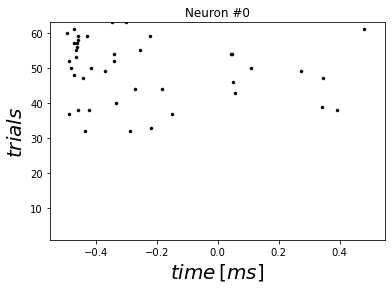

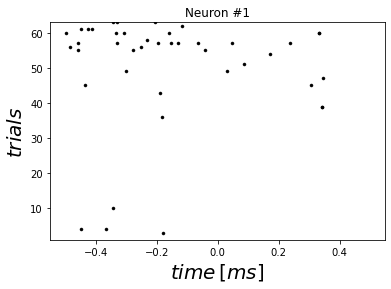

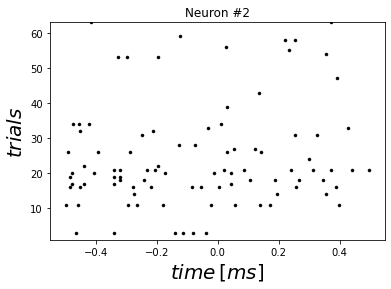

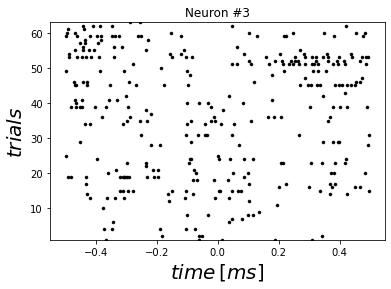

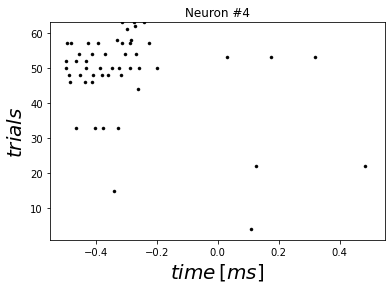

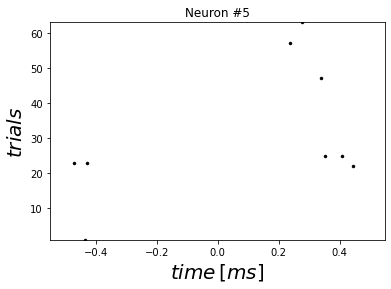

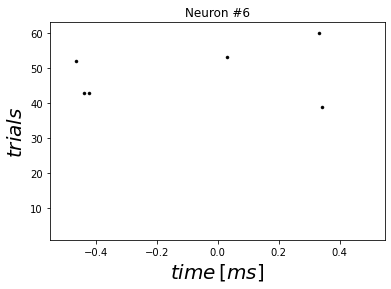

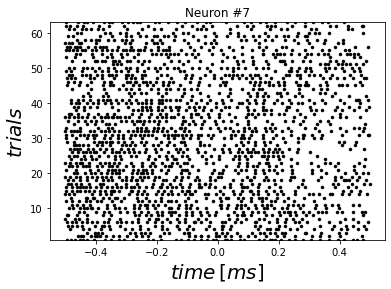

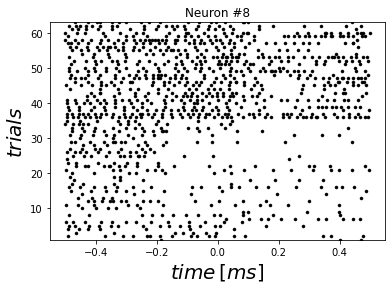

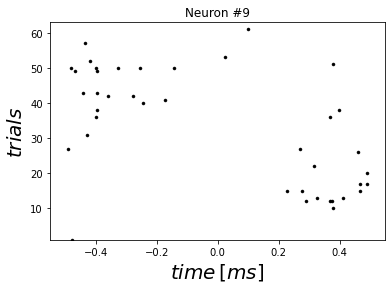

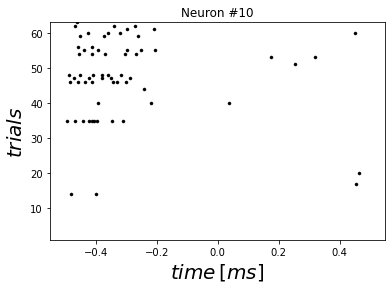

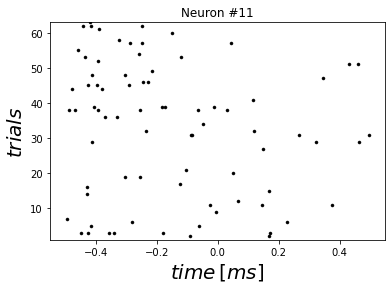

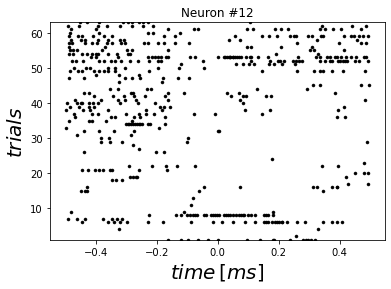

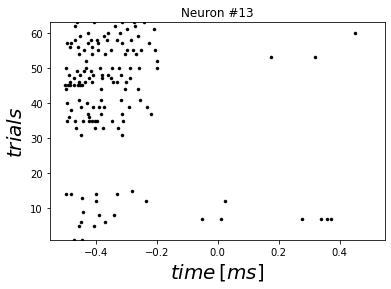

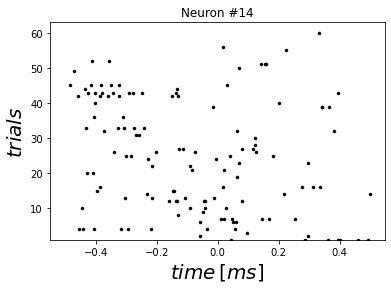

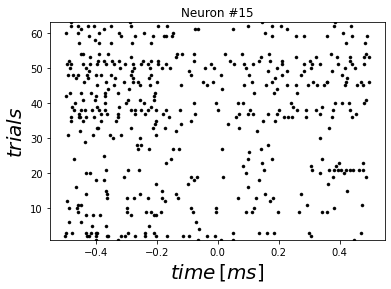

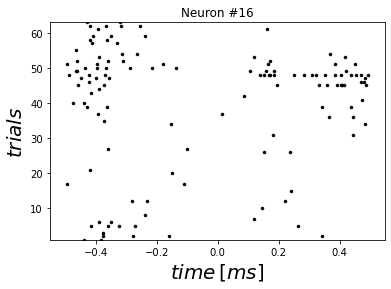

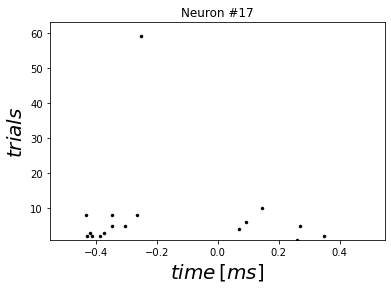

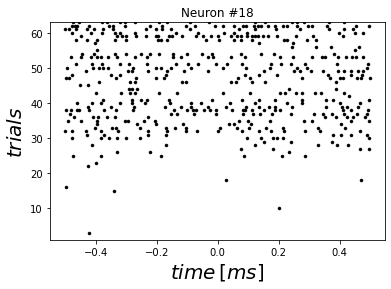

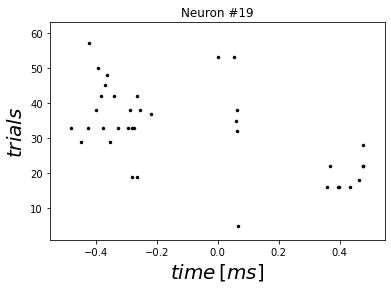

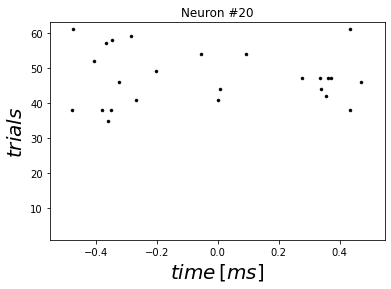

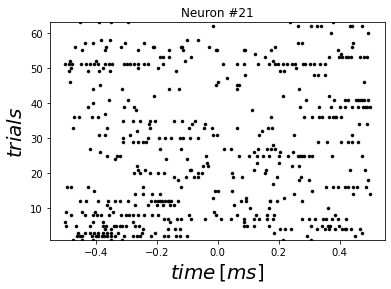

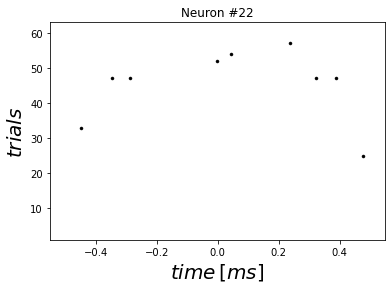

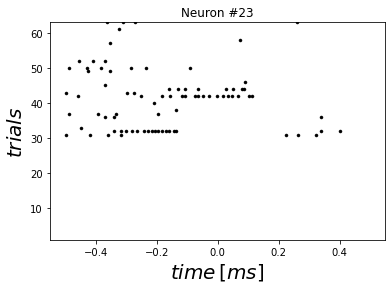

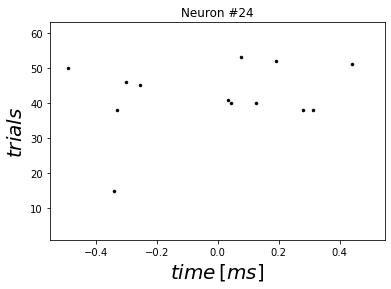

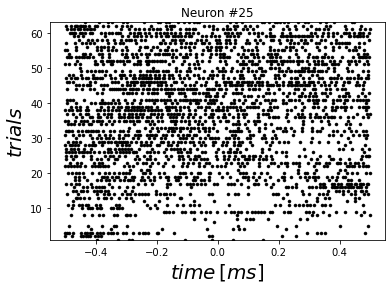

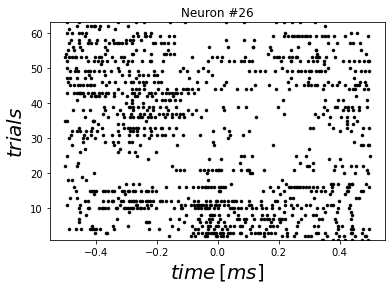

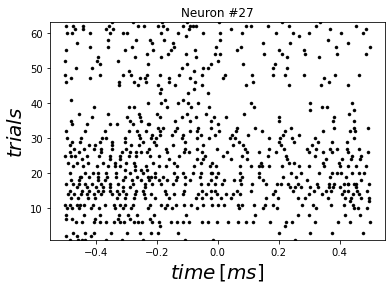

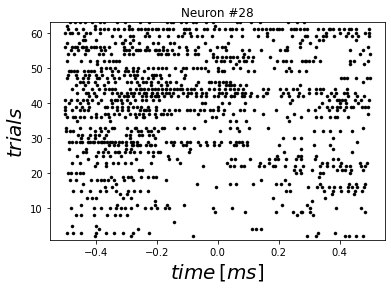

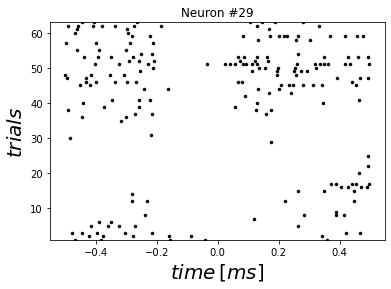

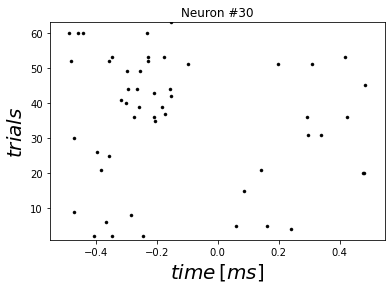

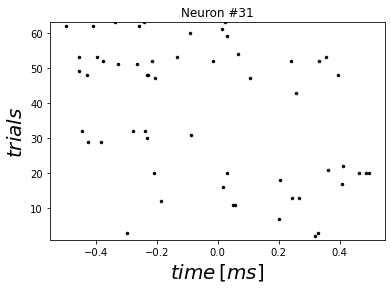

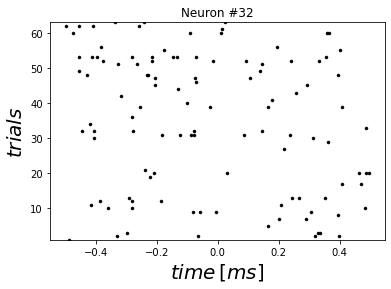

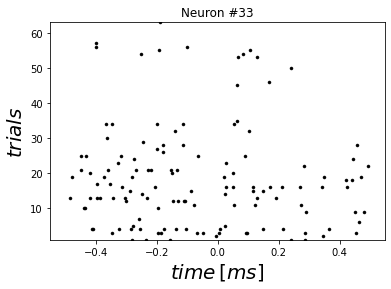

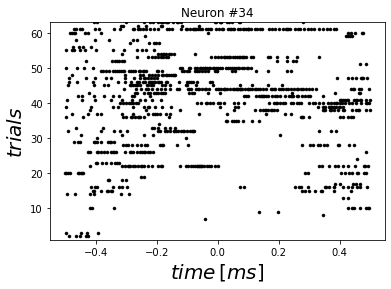

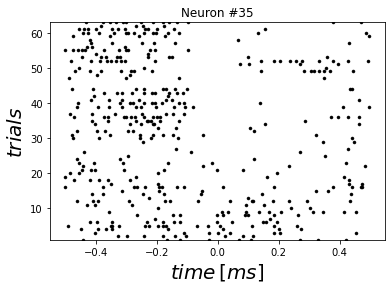

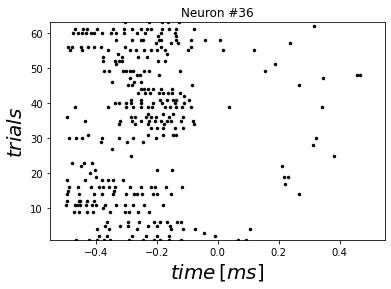

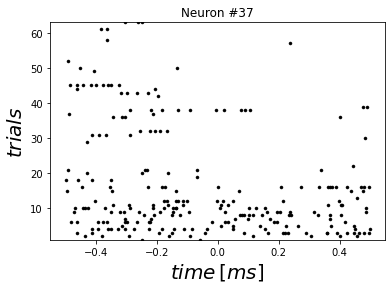

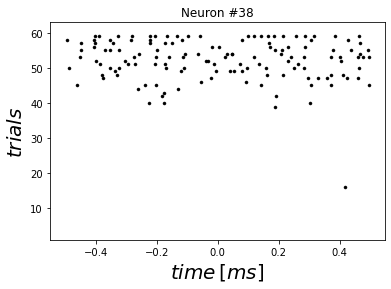

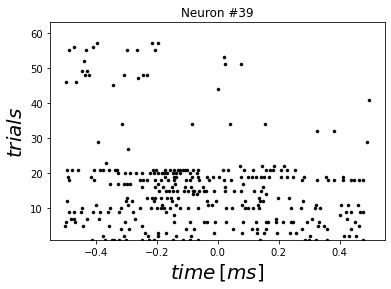

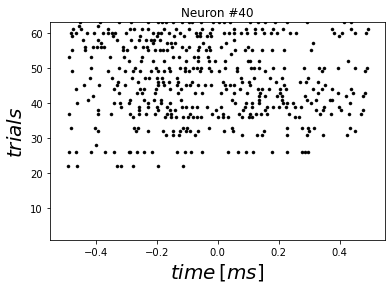

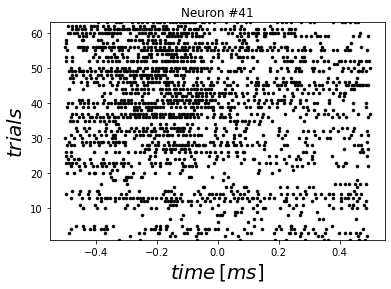

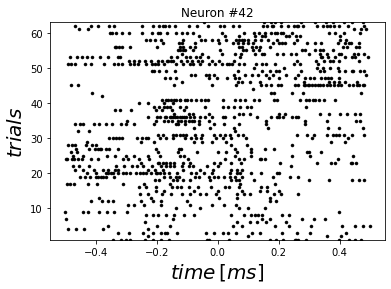

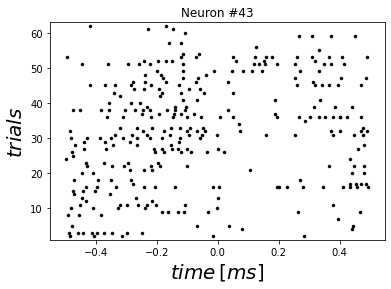

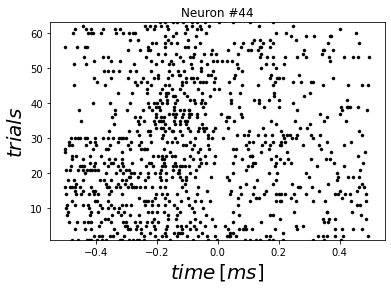

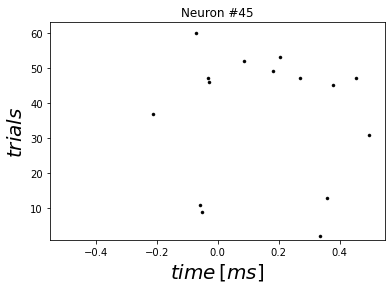

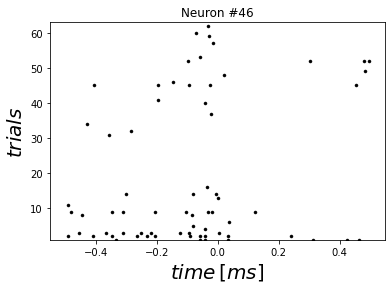

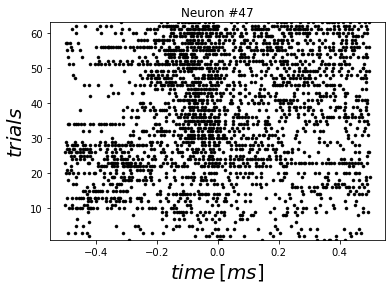

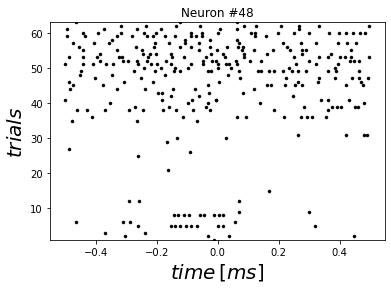

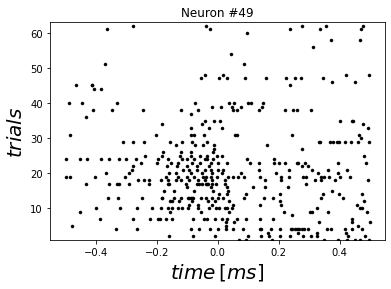

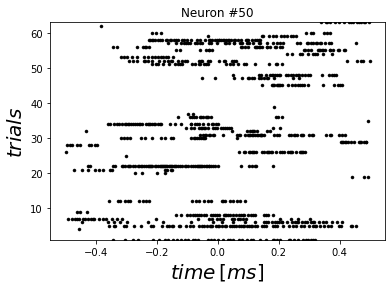

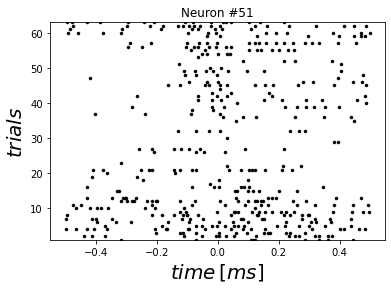

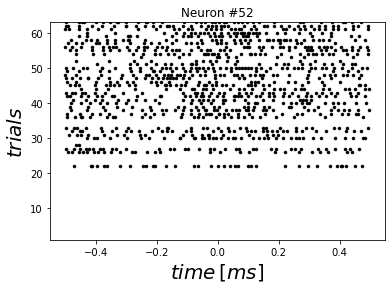

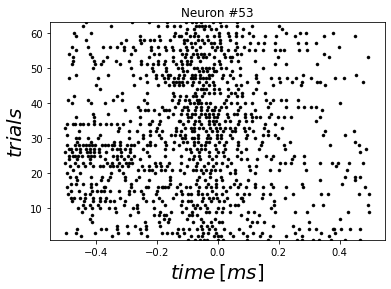

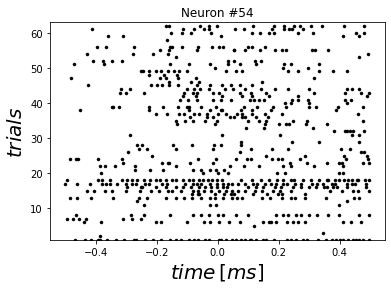

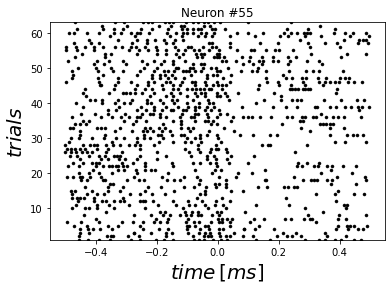

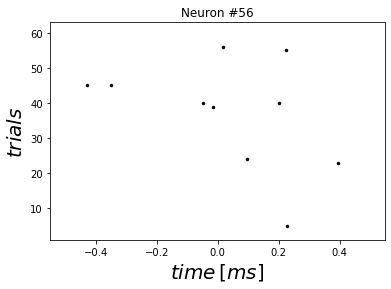

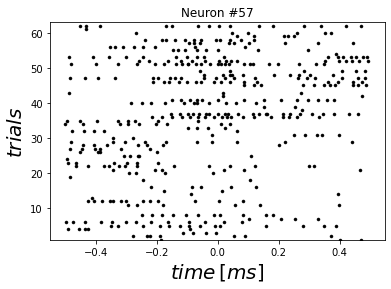

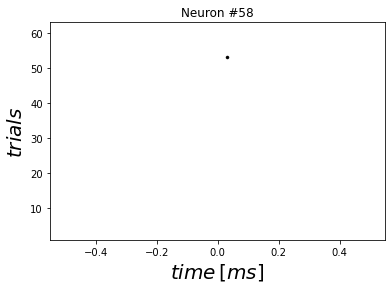

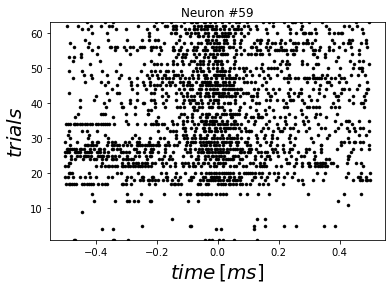

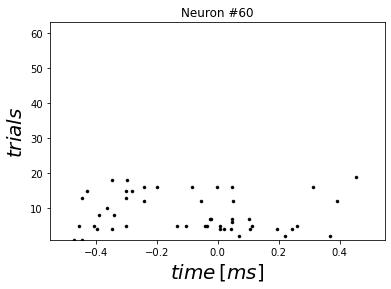

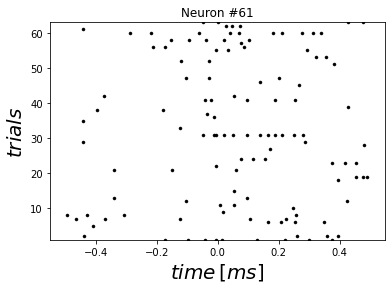

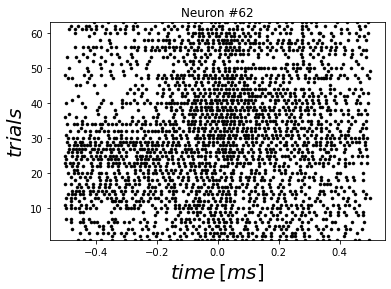

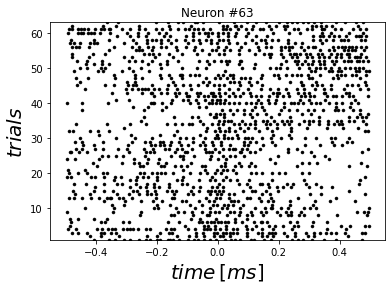

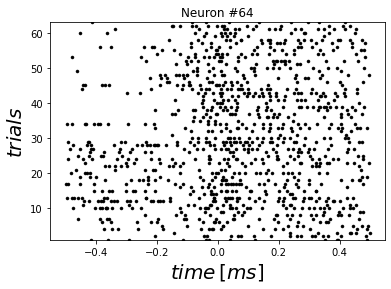

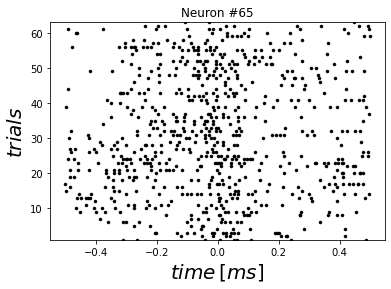

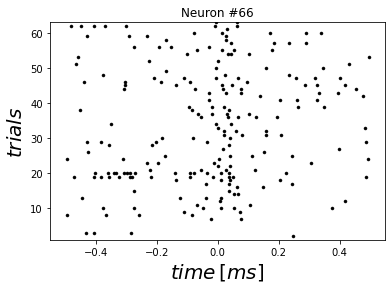

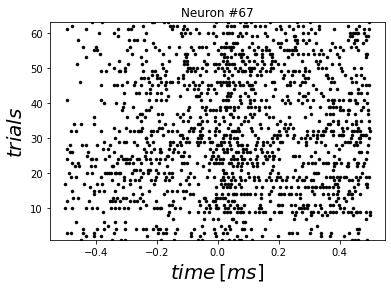

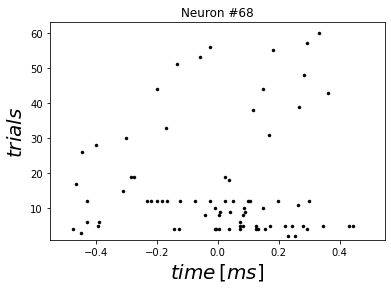

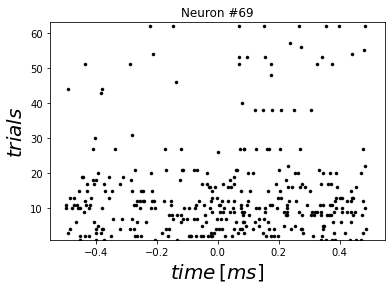

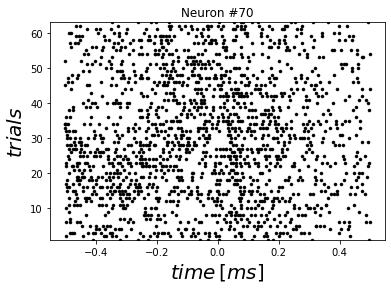

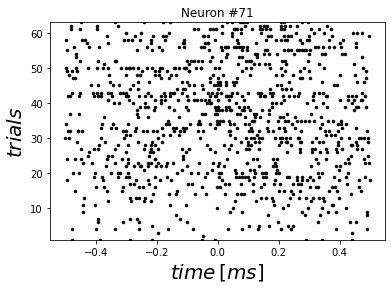

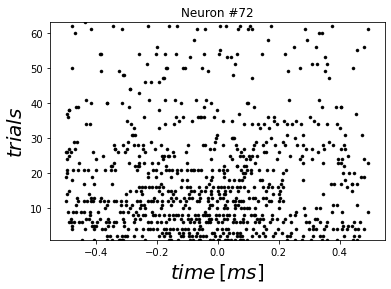

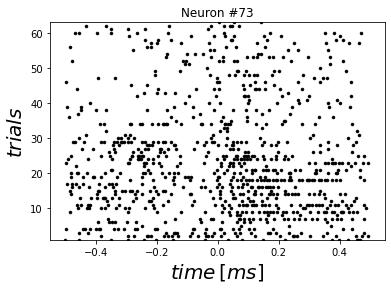

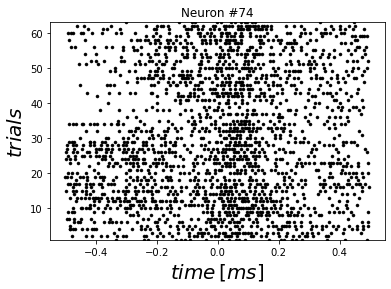

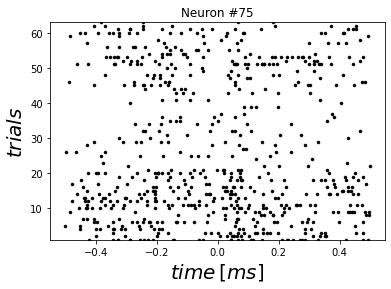

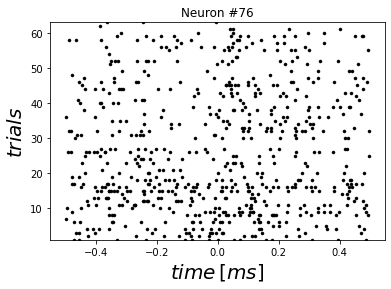

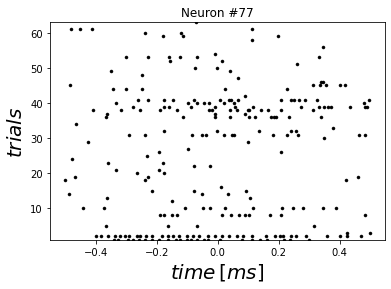

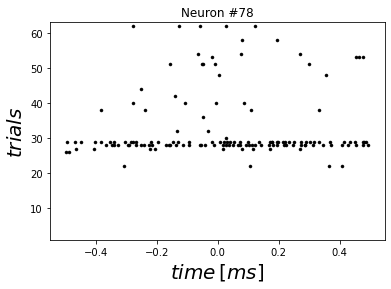

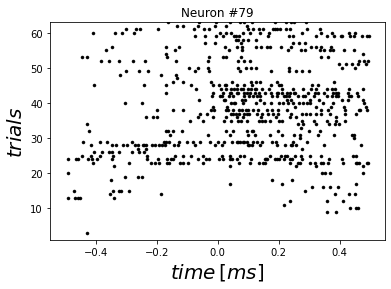

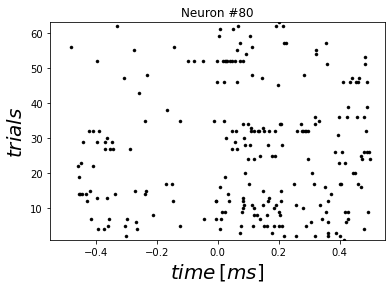

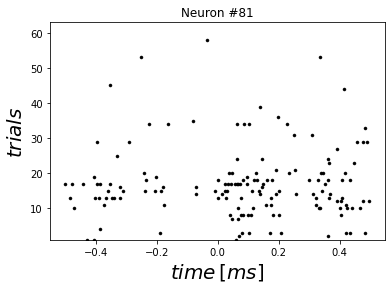

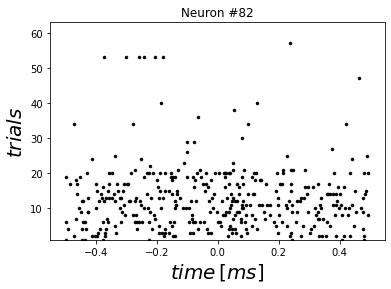

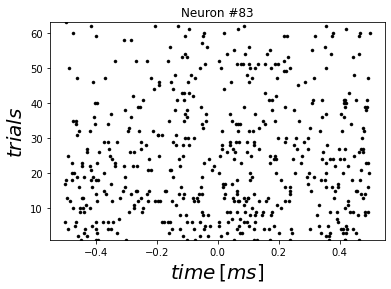

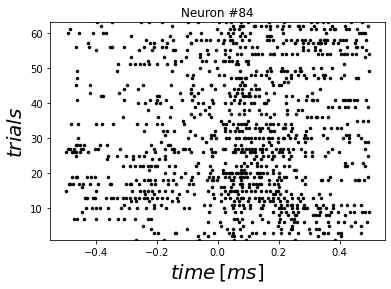

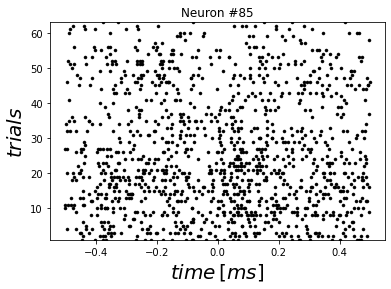

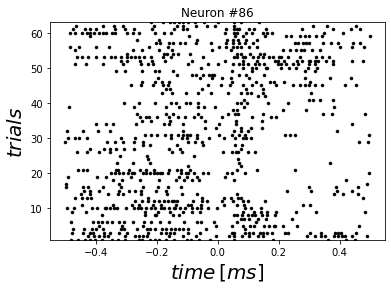

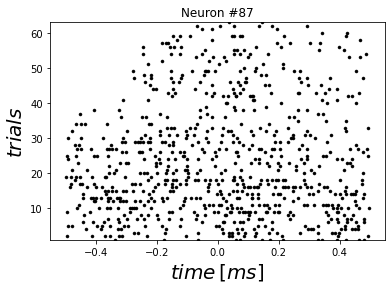

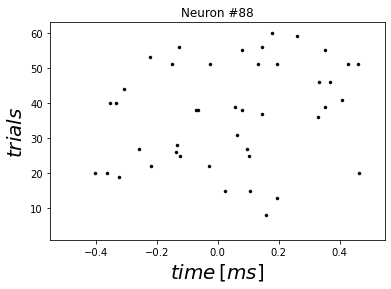

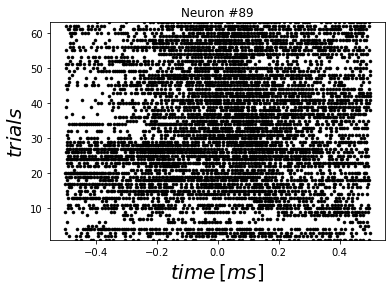

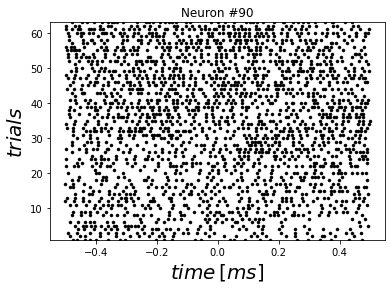

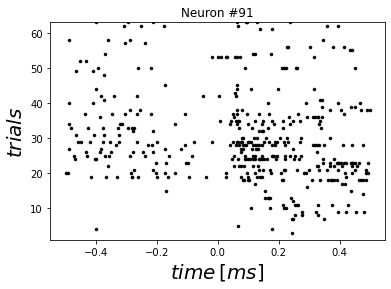

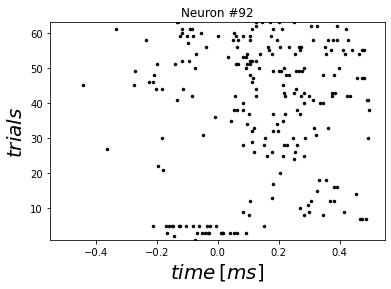

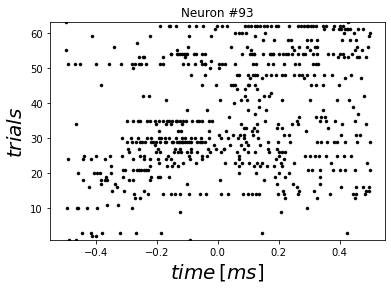

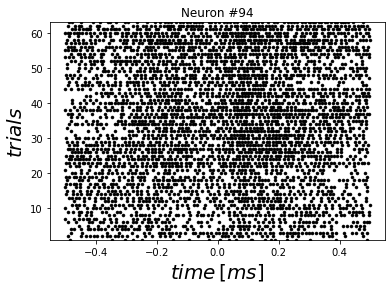

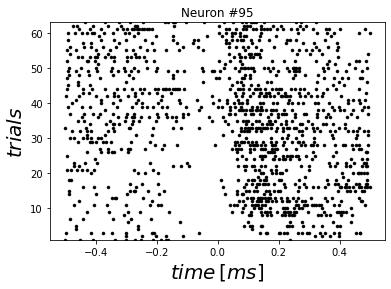

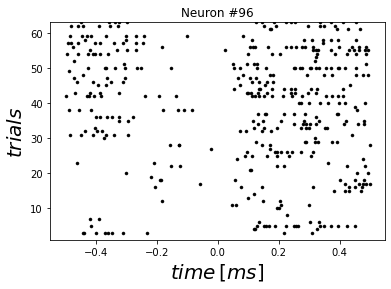

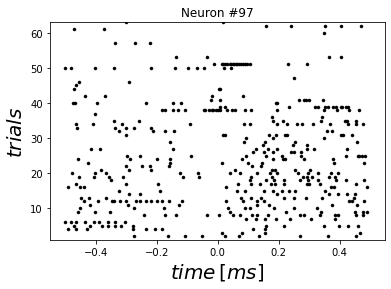

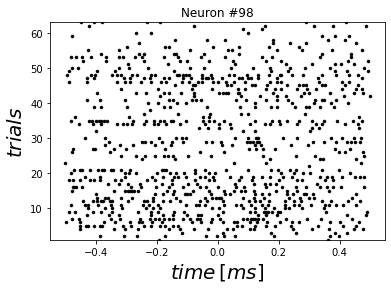

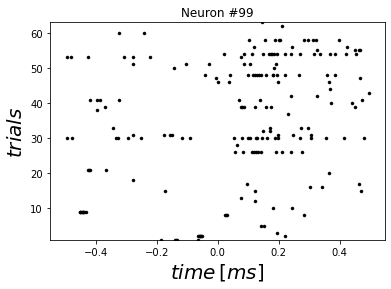

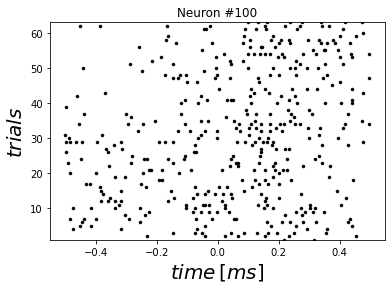

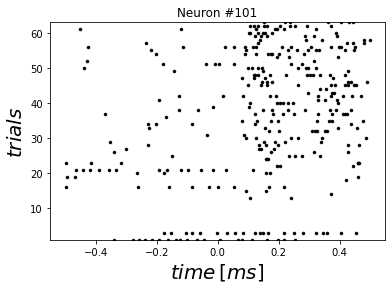

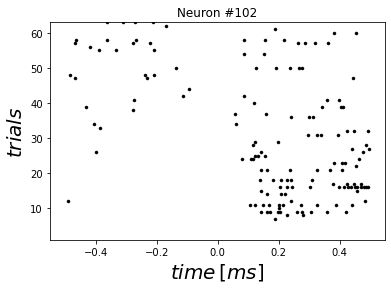

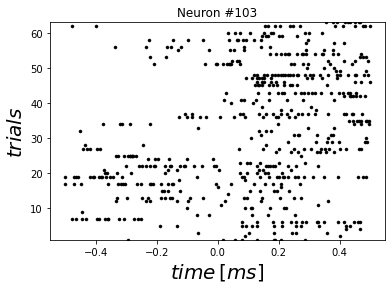

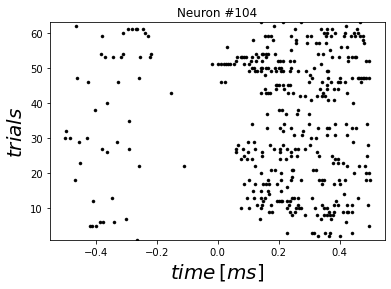

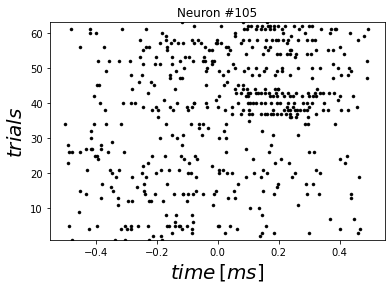

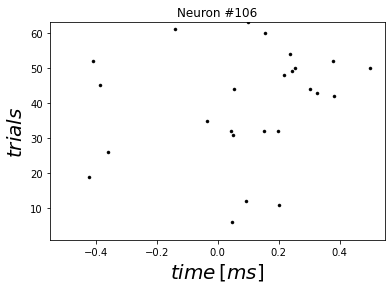

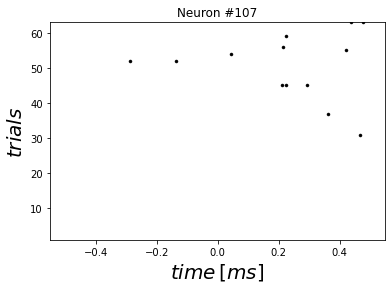

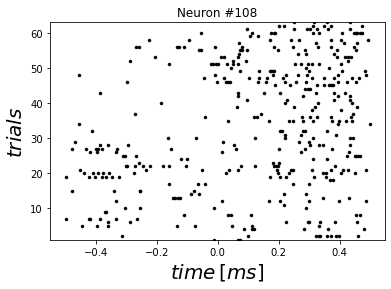

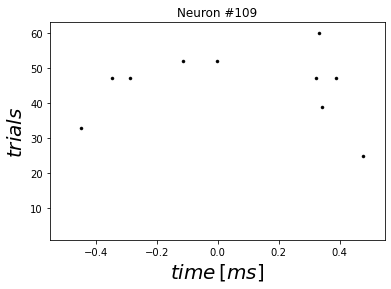

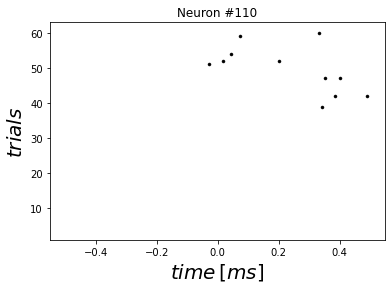

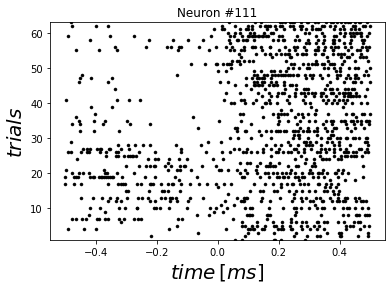

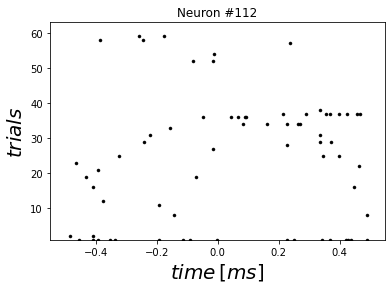

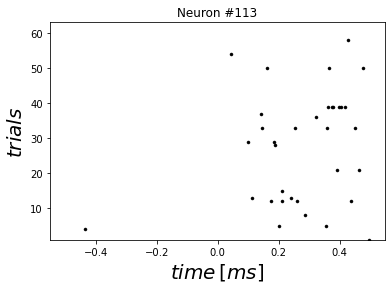

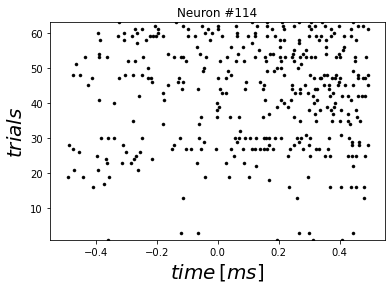

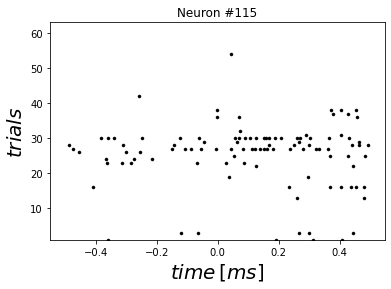

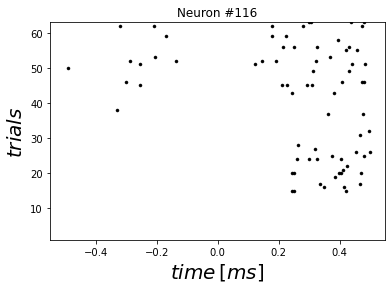

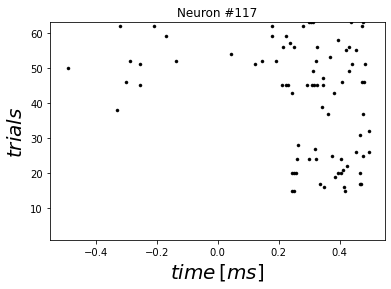

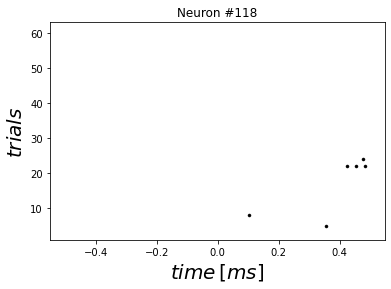

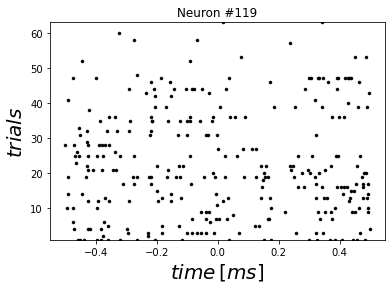

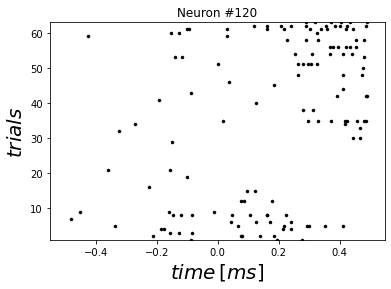

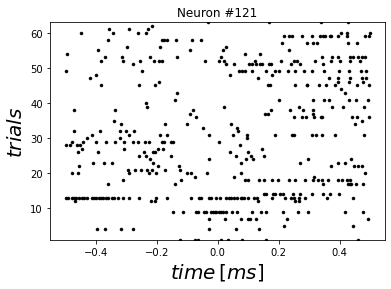

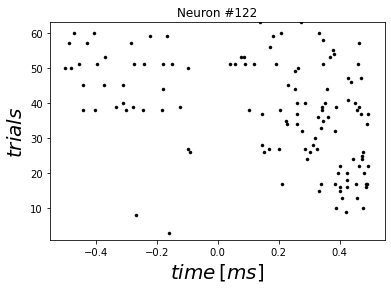

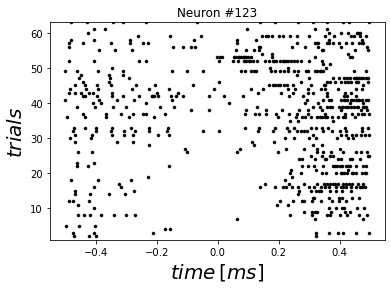

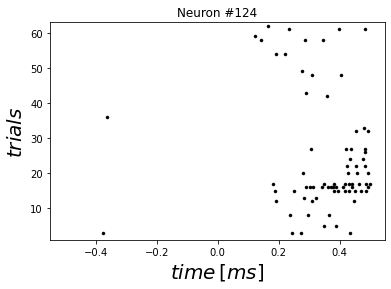

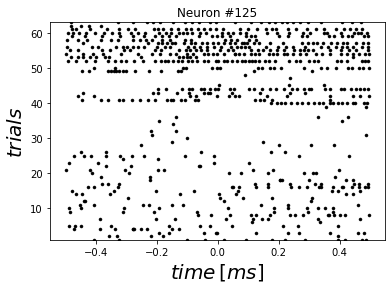

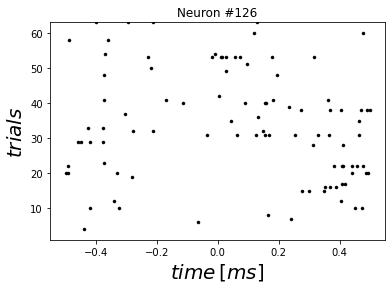

In [23]:
edgesl = np.arange(-0.5,0.5, 0.001)
for i,times in enumerate(df_m.times):
    axes=plt.gca()
    times = np.array(times)
    rFireHistAll = []
    for j,r in enumerate(df_reaches.rMax_t):
        rFireTimes = np.array(times[(times >= r-0.5) & (times <= r+0.5)])
        edges = np.arange(r-0.5,r+0.5, 0.001)
        rFireHist = np.histogram(rFireTimes, edges)[0]
        rFireHistAll.append(fireReachTimeframe)
        plt.ylim(1,np.shape(df_reaches)[0])
        axes.plot(edgesl[:-1], rFireHist*(j+1),"o",markersize=3,mew=0.5,color='black')
        axes.set_xlabel(r'$time \/ [ms]$',fontsize=20)
        axes.set_ylabel(r'$trials$',fontsize=20)
    
    plt.title("Neuron #" + str(i))
    plt.show()
    plt.close()

In [17]:
# colors = ['mediumpurple','cornflowerblue','violet','turquoise','mediumpurple','lightgreen','cornflowerblue','violet','turquoise','mediumpurple','lightgreen','cornflowerblue','violet','turquoise','mediumpurple','lightgreen','cornflowerblue','violet','turquoise','mediumpurple','lightgreen','cornflowerblue','mediumpurple','lightgreen','cornflowerblue','violet','turquoise','mediumpurple','lightgreen','cornflowerblue']
# plt.figure()
# plt.subplots(figsize=(8,4))
# axes=plt.gca()
# linewidth = 0.5
# markersize=3
# for i,rast in enumerate(df_clust.rast):
#     cl = int(df_clust.clust[i])
#     color = colors[cl]
#     x = np.arange(-0.5,0.5,0.001)
#     y = np.array(rast)
#     axes.plot(x[:-1], y*(i+2),"o",markersize=markersize,mew=linewidth,color=color) 
#     axes.set_xlabel(r'$time \/ (s)$',fontsize=20)
#     #axes.set_ylabel(r'$trials$',fontsize=20)
#     axes.tick_params(axis='both',labelsize=20)
#     #axes.axvline(0,linestyle='--',color='grey')
#     axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
#     axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')
# #plt.savefig(r'C:\Users\Kim\Documents\conferences\ARMartin\testfog2.svg')
# plt.ylim(np.shape(rast_maps)[0],3)
# #plt.savefig(r'Y:\BIOElectricsLab\Kim\ConferenceGrantFigs\MyelinGrant\cntrl_raster\komiyamafig.png')
# plt.show()

In [13]:
#df_m = df_m.reset_index()
df_m = df_m[df_m.mod_up=='yes'][df_m.epochFR>1]
df_affinewarp = pd.DataFrame(columns=['trials', 'spiketimes', 'unit_ids'])

print("hi")
for j,r in enumerate(df_reaches.rMax_t):
    df_trialSpikes = pd.DataFrame(columns=['trials', 'unit_ids', 'spiketimes'])
    for i,times in enumerate(df_m.times):
        times = np.array(times)
        valid_times = np.array(times[(times >= r-0.6) & (times <= r+0.6)])
        #valid_id = df_m.cell[i]
        for validTimes in valid_times:
            validSpike = {'trials': j, 'spiketimes': ((validTimes-r)*1000), 'unit_ids': i}
            df_trialSpikes = pd.concat([df_trialSpikes, pd.DataFrame([validSpike])], ignore_index=True)

    df_trialSpikes = df_trialSpikes.sort_values(by=['spiketimes'])
    df_affinewarp = pd.concat([df_affinewarp, df_trialSpikes])
print(df_affinewarp)


C:\Users\Kim\AppData\Local\Temp/ipykernel_32504/2358031410.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_m = df_m[df_m.mod_up=='yes'][df_m.epochFR>1]


hi
    trials  spiketimes unit_ids
455      0 -598.576882       46
48       0 -597.710216       11
612      0 -596.576882       51
872      0 -594.610216       72
870      0 -594.410216       71
..     ...         ...      ...
168     42  588.639369       13
169     42  594.306036       13
715     42  596.239369       47
246     42  596.239369       18
27      42  597.006036        3

[49961 rows x 3 columns]


#### Hyperparameters for data preprocessing and models.

In [14]:
# Trial duration and bin size parameters.
TMIN = -100  # ms
TMAX = 100   # ms
BINSIZE = 5  # ms
NBINS = int((TMAX - TMIN) / BINSIZE)

# # LFP parameters.
# LOW_CUTOFF = 10  # Hz
# HIGH_CUTOFF = 30  # Hz

# # Hyperparameters for shift-only warping model.
# SHIFT_SMOOTHNESS_REG = 0.5
# SHIFT_WARP_REG = 1 #was 1e-2
# MAXLAG = 0.15 #must be between 0 and 0.5, was 0.15

# # Hyperparameters for linear warping model.
# LINEAR_SMOOTHNESS_REG = 1.0
# LINEAR_WARP_REG = 0.065


### Load data.

Spike times here represent simple threshold-crossing events—no spike sorting was performed.

All spike times are defined relative to "GO CUE".

In [15]:
#df_affinewarp = df_affinewarp.drop(["index"], axis=1)
df_affinewarp

trials  spiketimes unit_ids
455      0 -598.576882       46
48       0 -597.710216       11
612      0 -596.576882       51
872      0 -594.610216       72
870      0 -594.410216       71
..     ...         ...      ...
168     42  588.639369       13
169     42  594.306036       13
715     42  596.239369       47
246     42  596.239369       18
27      42  597.006036        3

[49961 rows x 3 columns]

In [130]:
# S = dict(np.load("/Users/cyue/Downloads/umi_spike_data.npz"))
# data = SpikeData(
#     trials=S["trials"],
#     spiketimes=S["spiketimes"],
#     neurons=S["unit_ids"],
#     tmin=TMIN,
#     tmax=TMAX,

In [131]:
# data = SpikeData(
#     trials=arrT,
#     spiketimes=arrS,
#     neurons=arrU,
#     tmin=TMIN,
#     tmax=TMAX)

In [132]:
# data

In [226]:
# count = 0
# for i, t in enumerate (df_affinewarp['spiketimes']):
#     if data['trials'][i] == 0:
#         print(t)
#         count = count+1
        
# print(count)
    
arrT = df_affinewarp['trials'].to_numpy()
arrS = df_affinewarp['spiketimes'].to_numpy()
arrU = df_affinewarp['unit_ids'].to_numpy()

In [227]:
from affinewarp import SpikeData

# Spike times.
#S = dict(np.load("/Users/cyue/Downloads/umi_spike_data.npz"))
data = SpikeData(
    trials= arrT,
    spiketimes= arrS,
    neurons= arrU,
    tmin=TMIN,
    tmax=TMAX,
)

#print((data['neurons']))
# Bin and normalize (soft z-score) spike times.
binned = data.bin_spikes(NBINS)
binned = binned - binned.mean(axis=(0, 1), keepdims=True)
binned = binned / (1e-2 + binned.std(axis=(0, 1), keepdims=True))

# Crop spike times when visualizing rasters.
cropped_data = data.crop_spiketimes(TMIN, TMAX)

### Fit warping models.

In [188]:
print(data['spiketimes'])

[-598.57688248 -597.71021588 -596.57688248 ...  594.30603596  596.23936936
  596.23936936]


In [228]:

# Hyperparameters for shift-only warping model.
SHIFT_SMOOTHNESS_REG = 1000 #was 0.5
SHIFT_WARP_REG = 1e-2 #was 1e-2
MAXLAG = 0.2 #must be between 0 and 0.5, was 0.15
# SHIFT_SMOOTHNESS_REG = 10000 #was 0.5
# SHIFT_WARP_REG = 1e-2 #was 1e-2
# MAXLAG = 0.30 #must be between 0 and 0.5, was 0.15

# Hyperparameters for linear warping model.
LINEAR_SMOOTHNESS_REG = 3 #was 1
LINEAR_WARP_REG = 0.01 #w2s 0.065

In [229]:
from affinewarp import ShiftWarping

# Specify model.
shift_model = ShiftWarping(
    smoothness_reg_scale=SHIFT_SMOOTHNESS_REG,
    warp_reg_scale=SHIFT_WARP_REG,
    maxlag=MAXLAG,
)

# Fit to binned spike times.
shift_model.fit(binned, iterations=50)

# Apply inverse warping functions to data.
shift_aligned_data = shift_model.transform(data).crop_spiketimes(TMIN, TMAX)

Loss: 0.87: 100%|█████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 530.67it/s]


In [230]:
from affinewarp import PiecewiseWarping

# Specify model.
lin_model = PiecewiseWarping(
    n_knots=2,
    smoothness_reg_scale=LINEAR_SMOOTHNESS_REG,
    warp_reg_scale=LINEAR_WARP_REG
)

# Fit to binned spike times.
lin_model.fit(binned, iterations=50)

# Apply inverse warping functions to data.
linear_aligned_data = lin_model.transform(data).crop_spiketimes(TMIN, TMAX)

Loss improvement: 2.01%: 100%|█████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.15it/s]


#### Compare optimization curves.

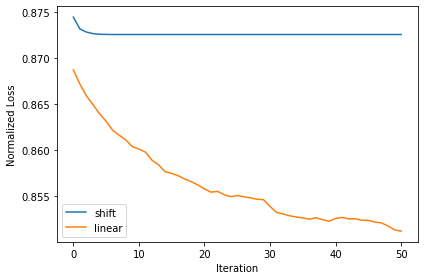

In [231]:
plt.plot(shift_model.loss_hist, label="shift")
plt.plot(lin_model.loss_hist, label="linear")
plt.xlabel("Iteration")
plt.ylabel("Normalized Loss")
plt.legend()
plt.tight_layout()

### Visualize raster plots

We visualize the first 30 multiunits. There are a total of 96 in this dataset.

In [233]:
def betterRaster(specialData):
    neuronNum = (len((np.unique(specialData['neurons'], return_counts=True))[0]))
    trialsNum = (len((np.unique(specialData['trials']))))
    trialsPerNeuron = ((np.unique(specialData['neurons'], return_counts=True))[1])

    df_data = pd.DataFrame()
    df_data['trials'] = specialData['trials']
    df_data['spiketimes'] = specialData['spiketimes']
    df_data['neurons'] = specialData['neurons']
    
    edgesl = np.arange(-0.1,0.1, 0.001)
    for x in range (neuronNum):
        axes=plt.gca()
        rFireHistAll = []
        for j in range(trialsNum):
            df_new = df_data[df_data['neurons'] == x]
            df_new = df_new[df_new['trials'] == j]
            df_new['spiketimes'] = df_new['spiketimes'].div(1000)
            edges = np.arange(r-0.1,r+0.1, 0.001)
            rFireHist = np.histogram(df_new['spiketimes'], edgesl)[0]
            rFireHistAll.append(fireReachTimeframe)
            plt.ylim(1,np.shape(df_reaches)[0])
            axes.plot(edgesl[:-1], rFireHist*(j+2),"o",markersize=3,mew=0.5,color='black')
            axes.set_xlabel(r'$time \/ [ms]$',fontsize=20)
            axes.set_ylabel(r'$trials$',fontsize=20)
    
        plt.title("Neuron #" + str(x))
        plt.show()
        plt.close()

In [234]:
#from affinewarp.visualization import rasters
#rasters(cropped_data);

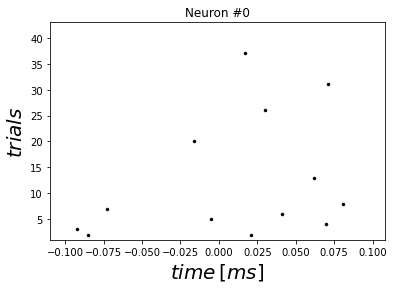

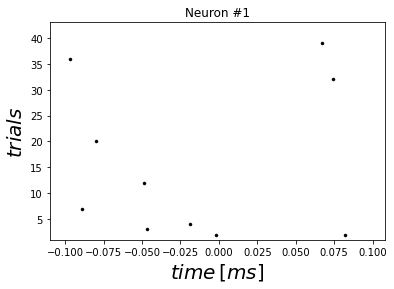

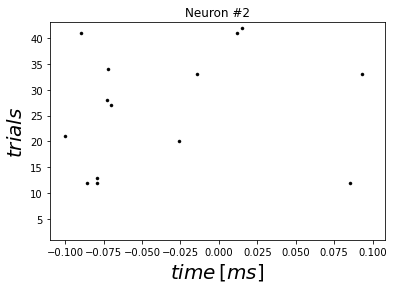

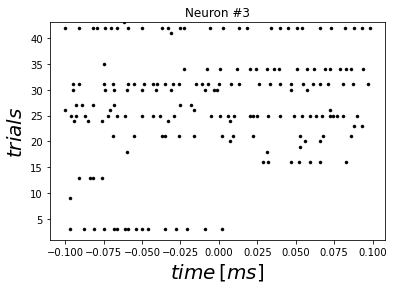

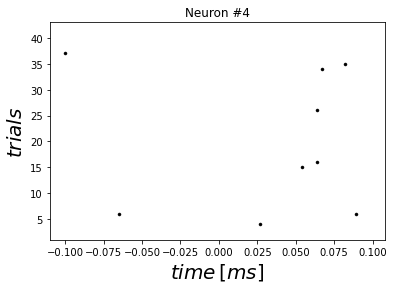

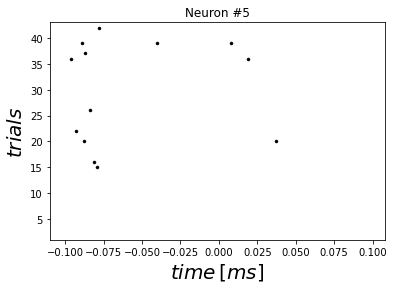

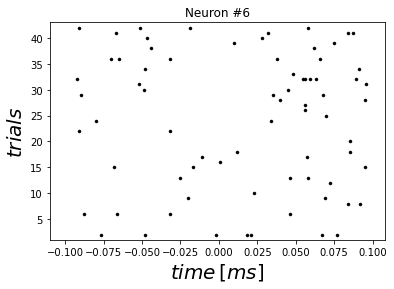

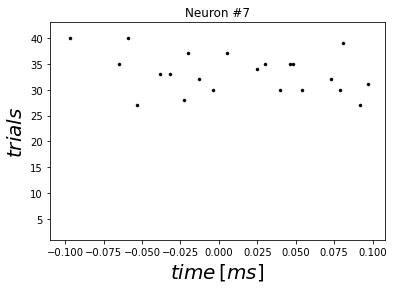

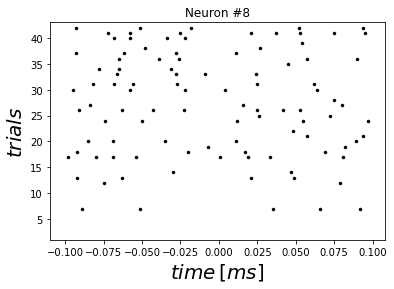

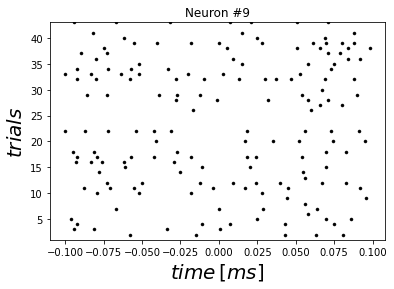

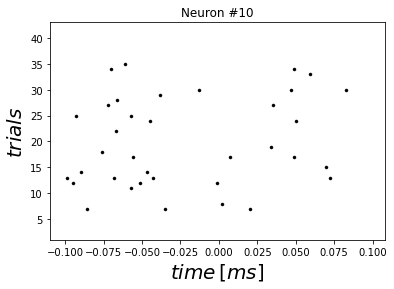

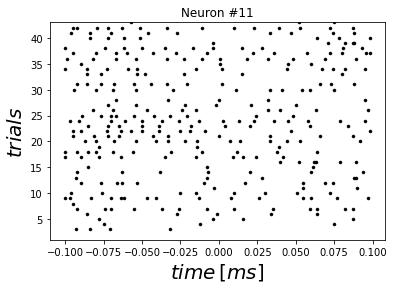

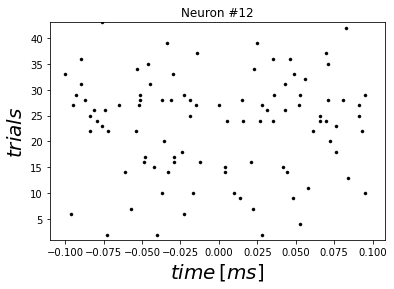

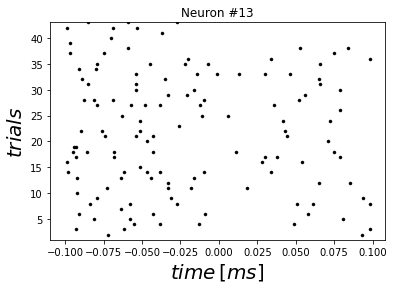

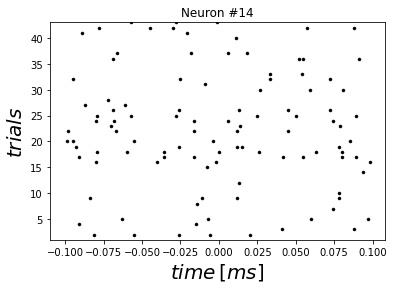

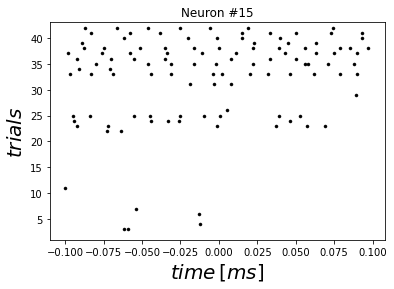

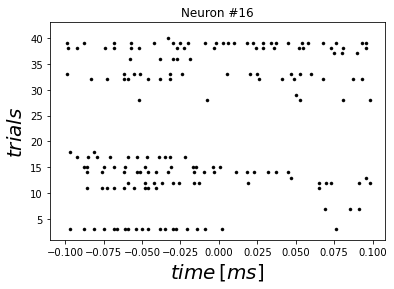

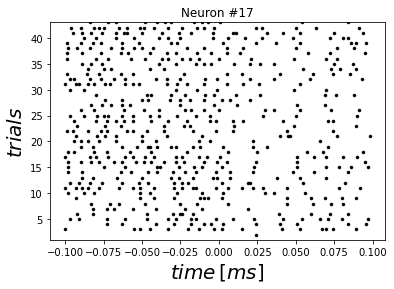

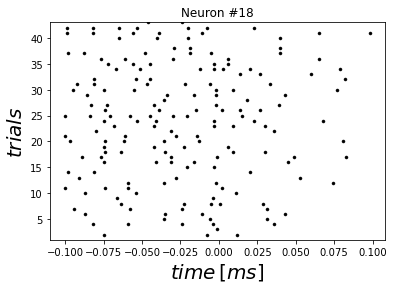

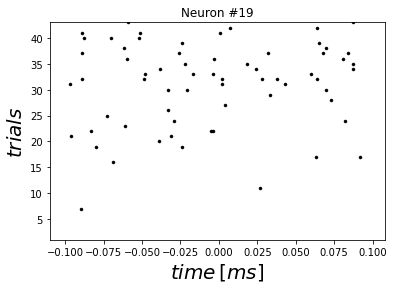

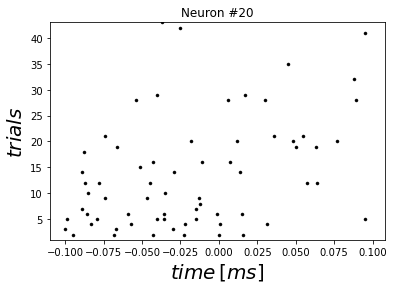

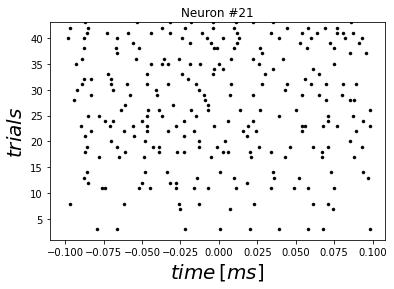

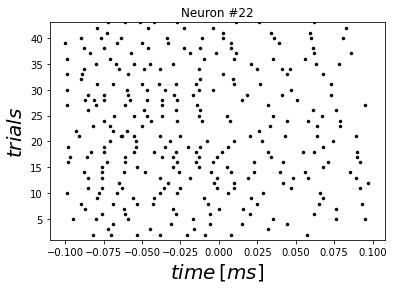

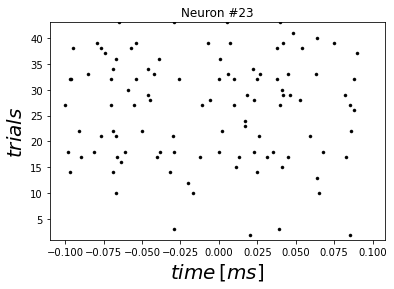

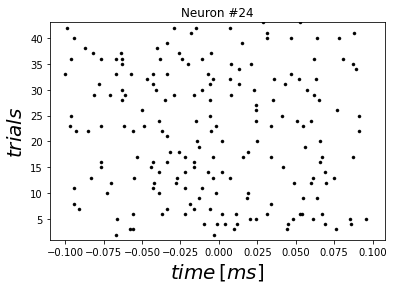

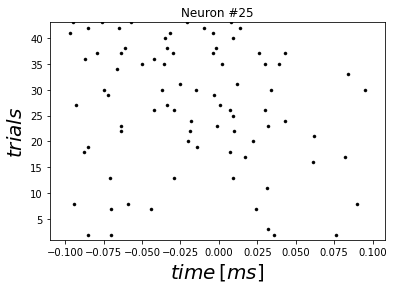

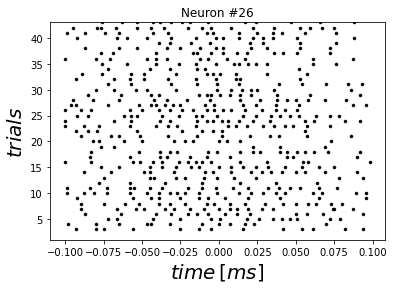

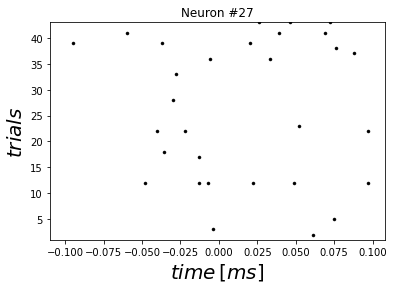

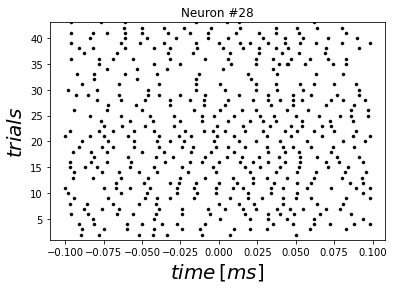

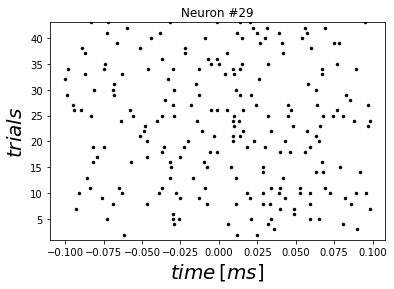

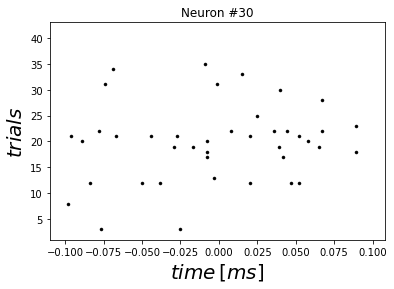

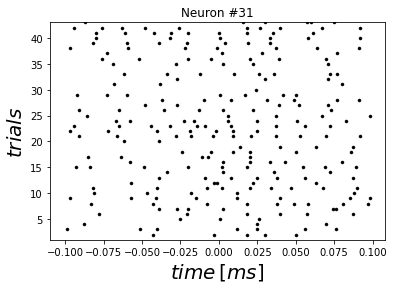

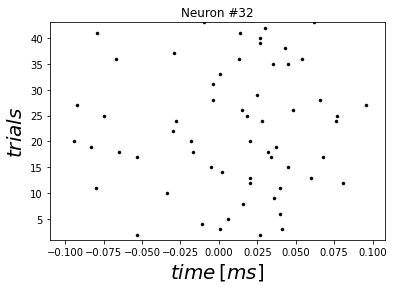

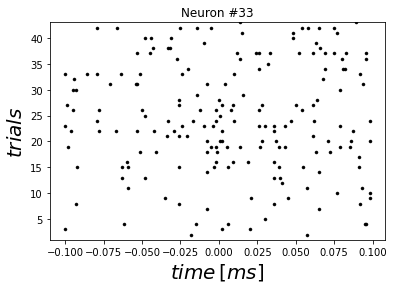

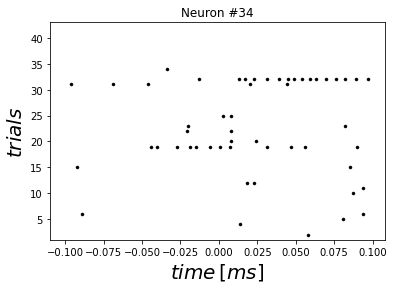

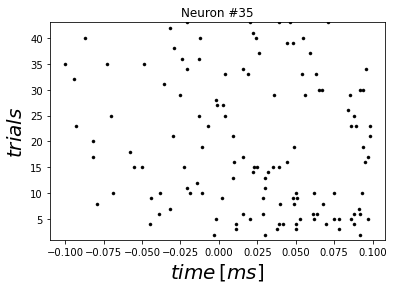

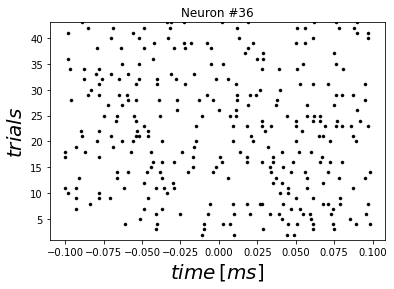

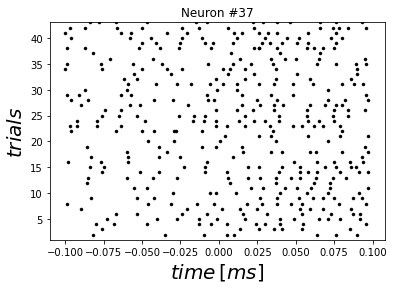

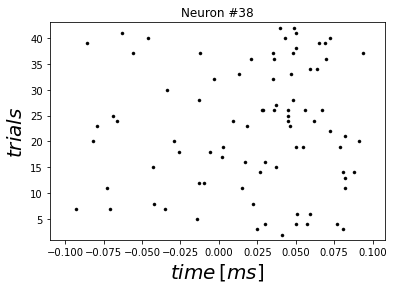

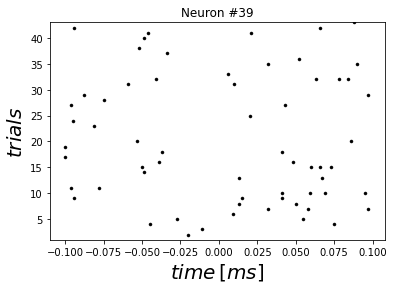

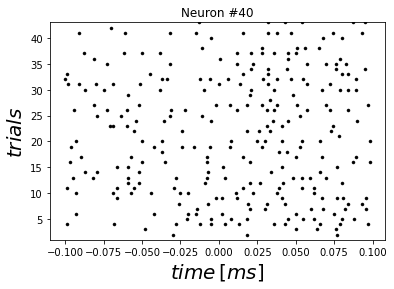

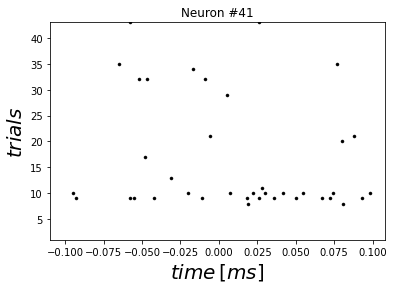

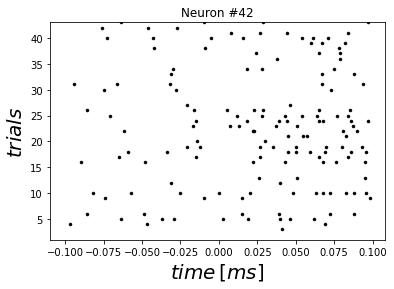

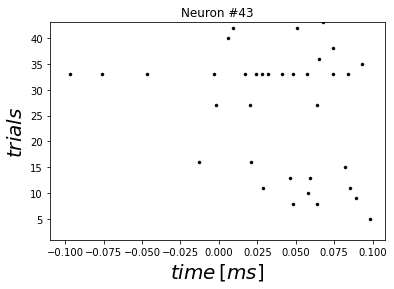

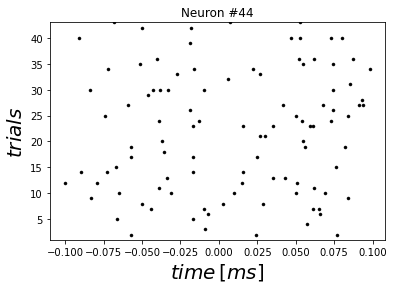

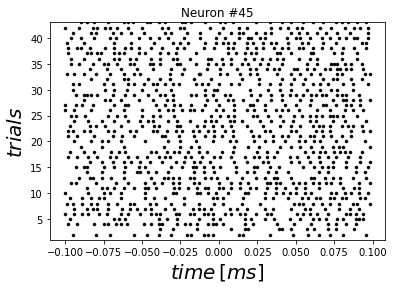

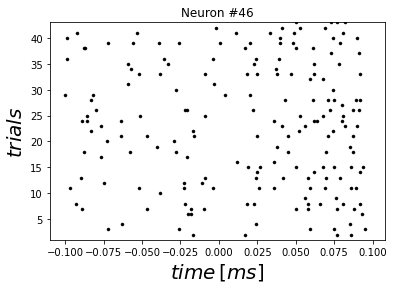

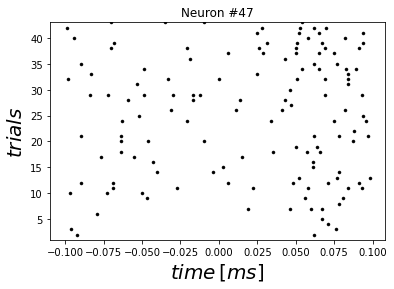

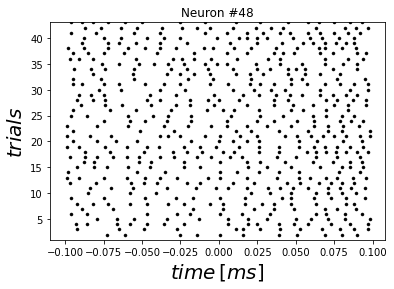

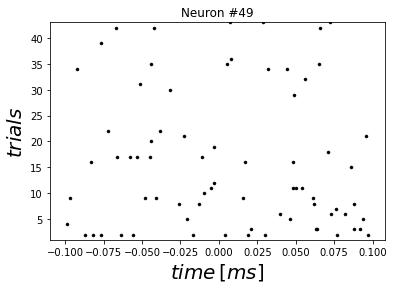

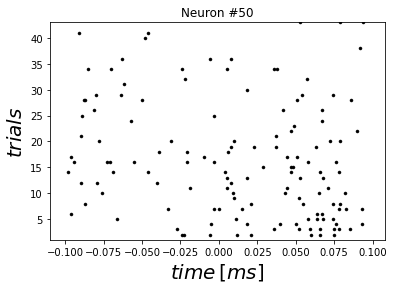

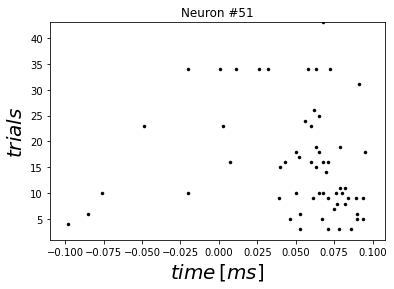

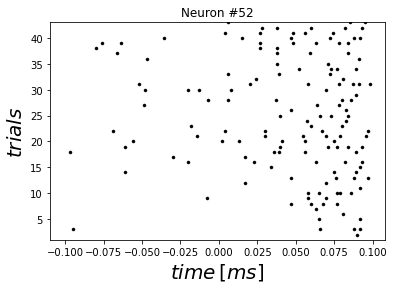

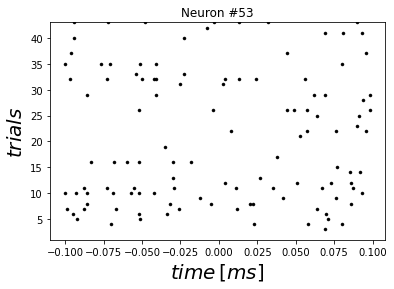

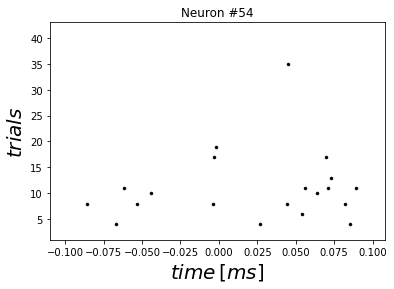

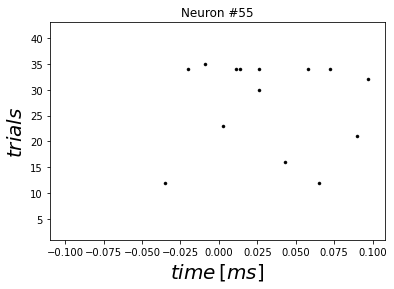

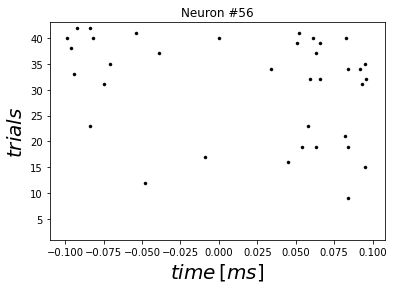

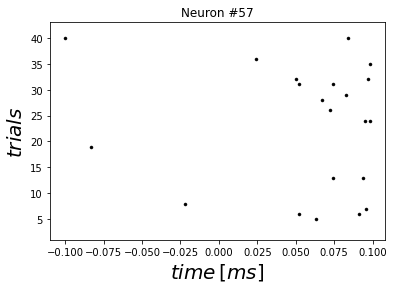

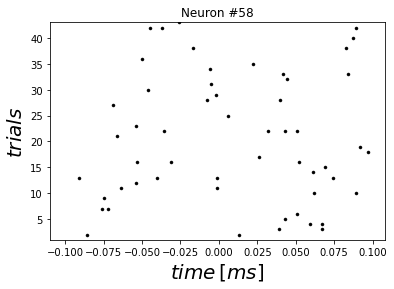

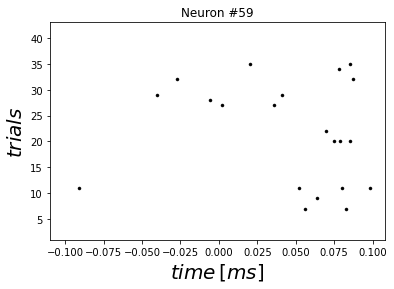

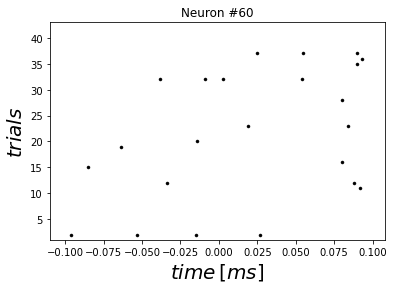

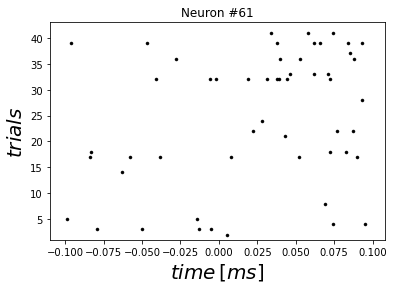

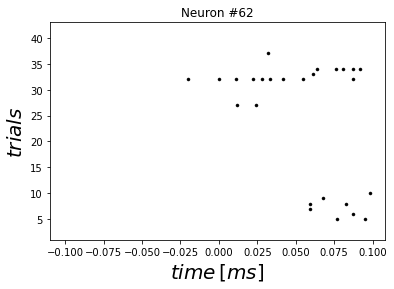

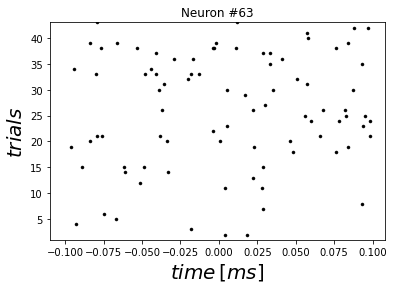

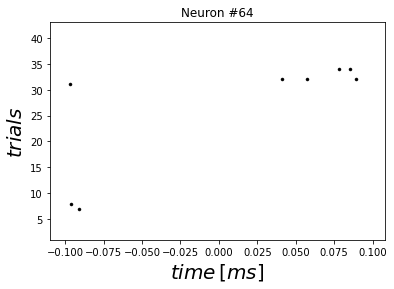

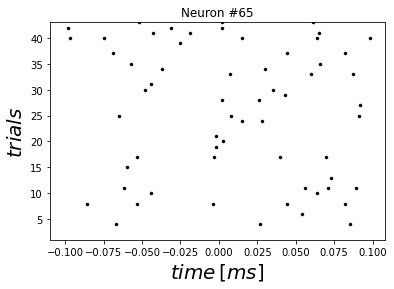

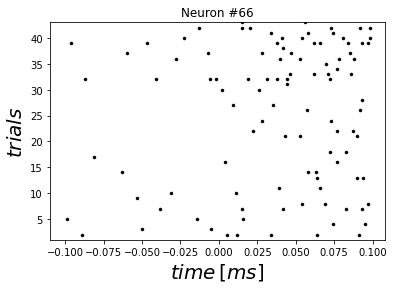

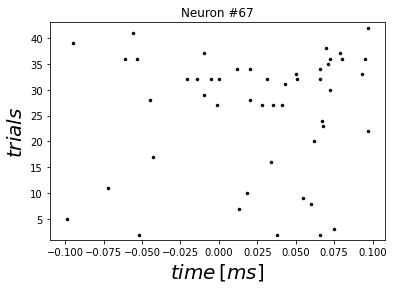

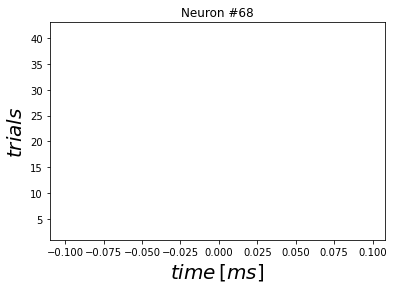

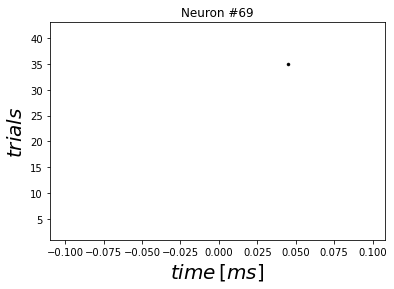

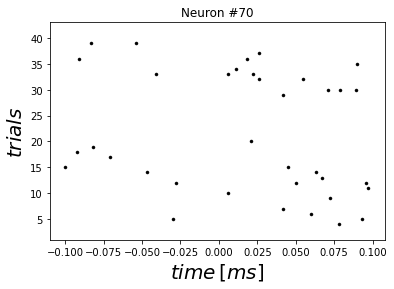

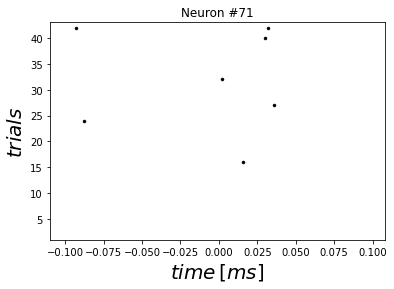

In [235]:
betterRaster(cropped_data)

In [236]:
#rasters(shift_aligned_data)

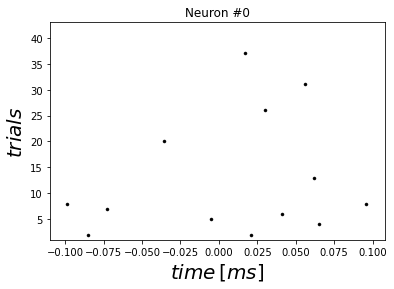

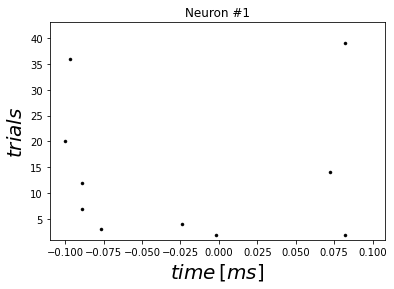

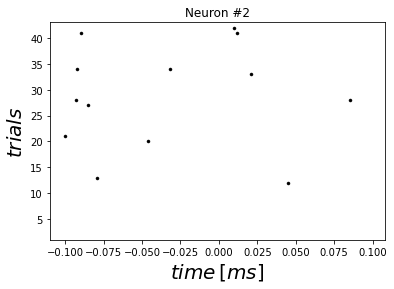

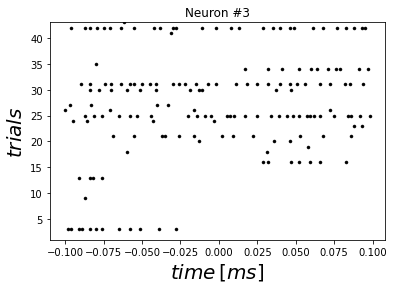

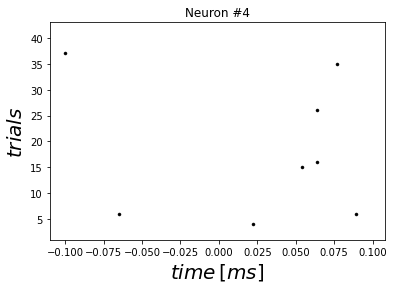

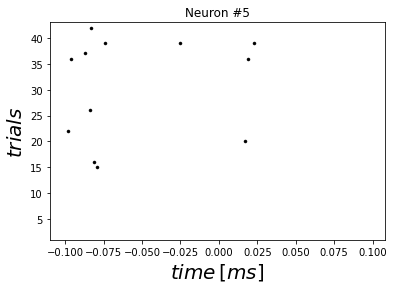

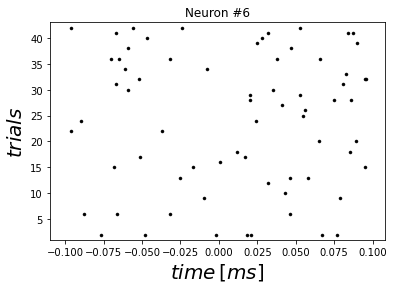

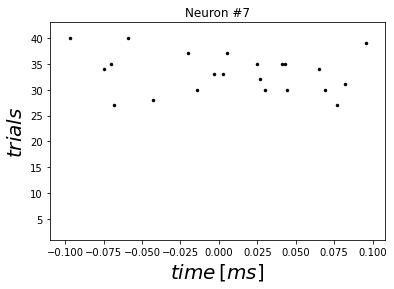

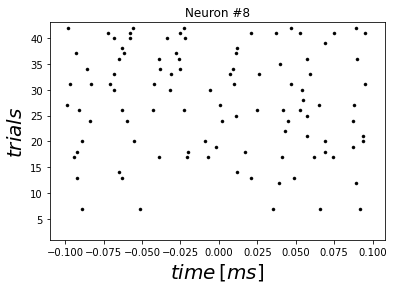

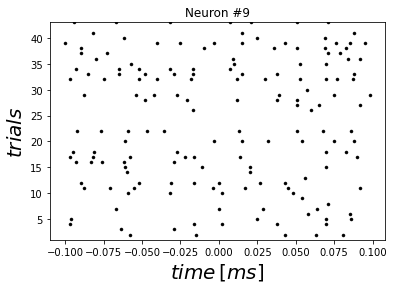

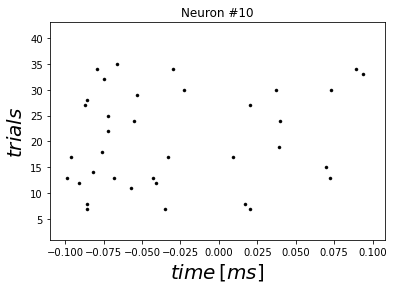

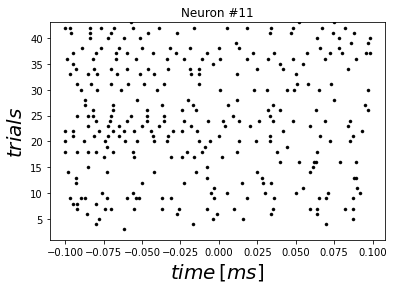

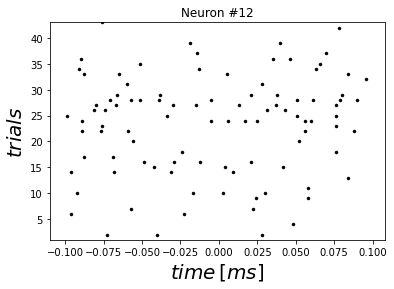

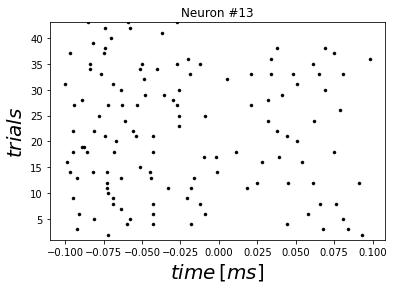

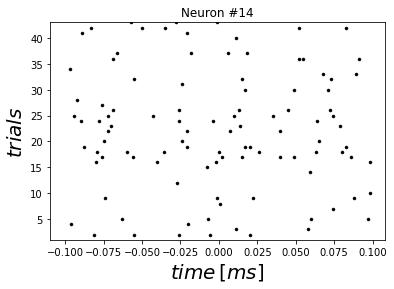

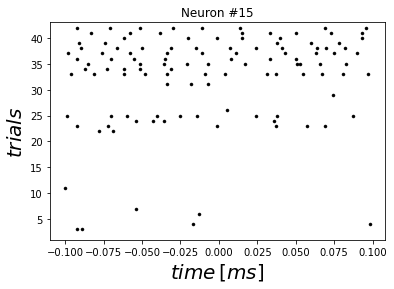

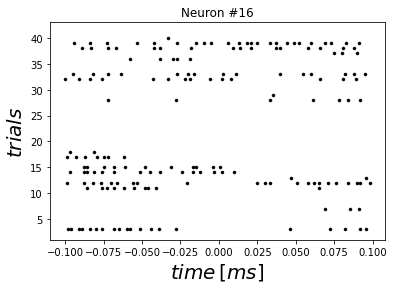

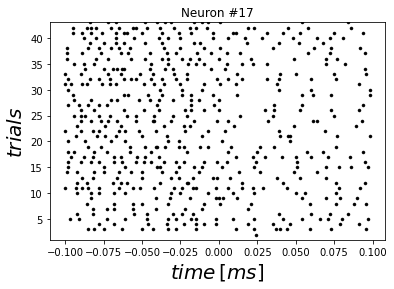

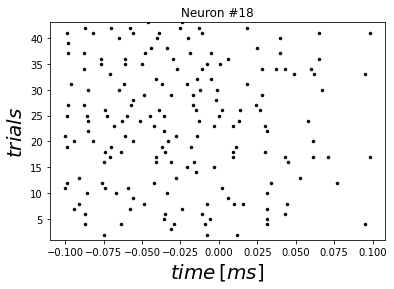

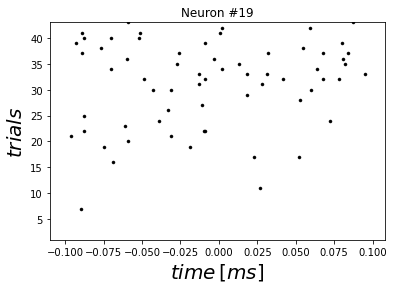

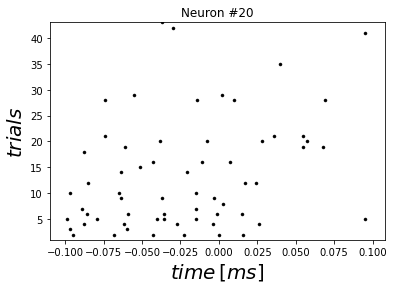

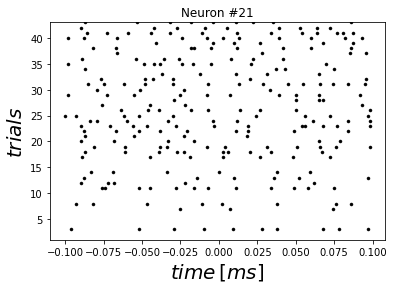

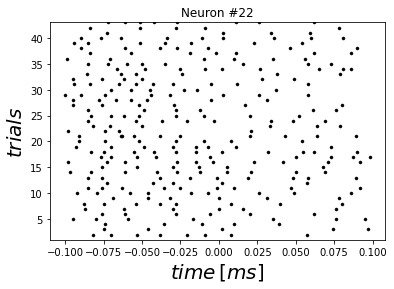

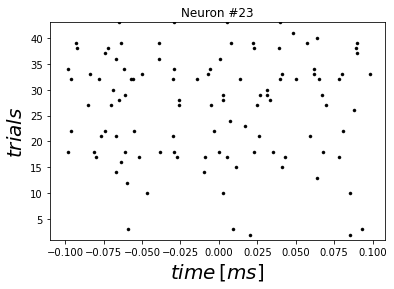

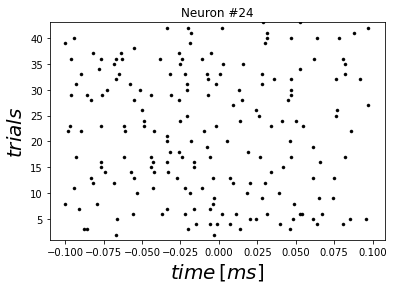

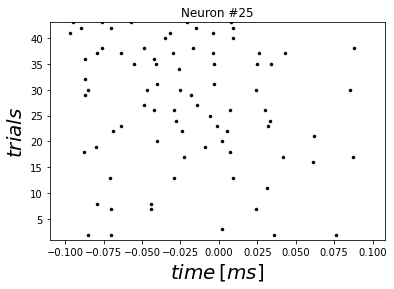

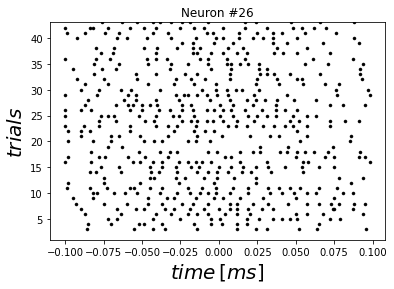

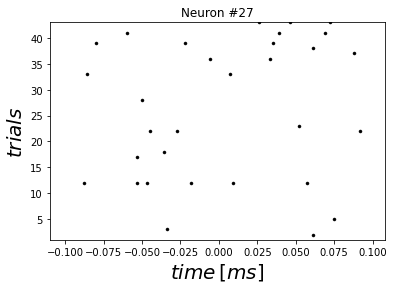

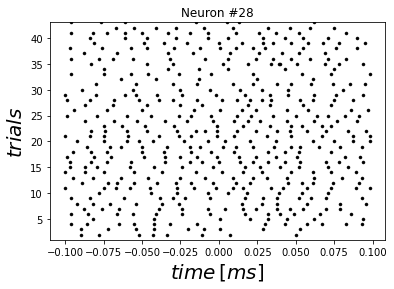

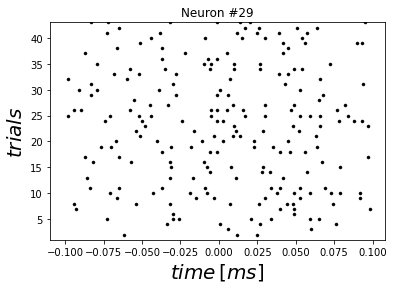

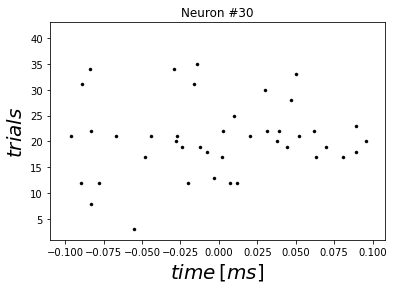

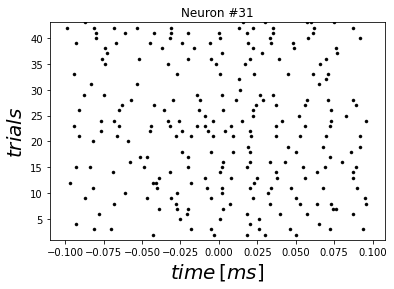

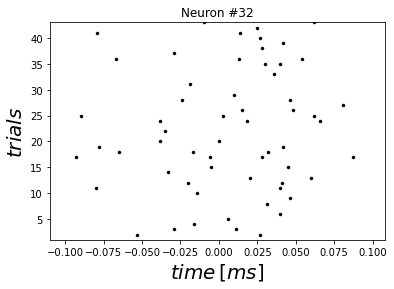

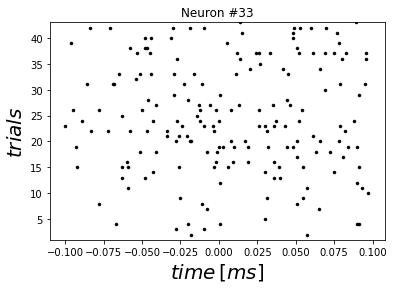

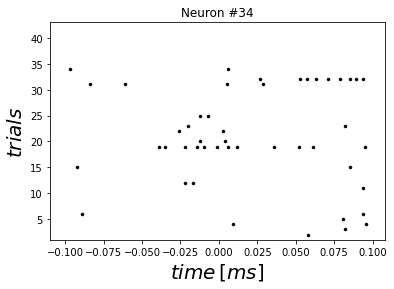

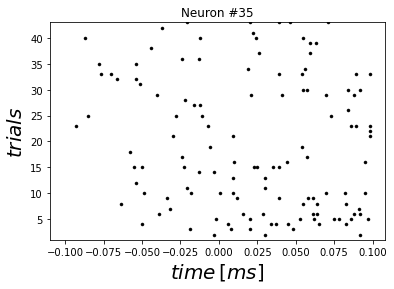

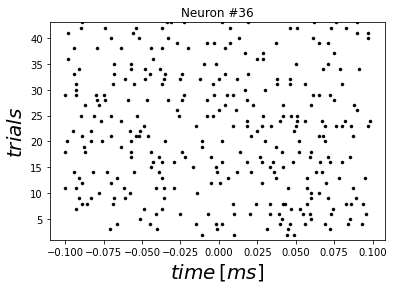

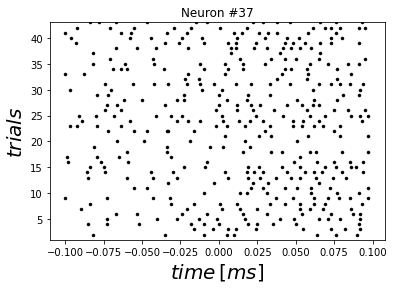

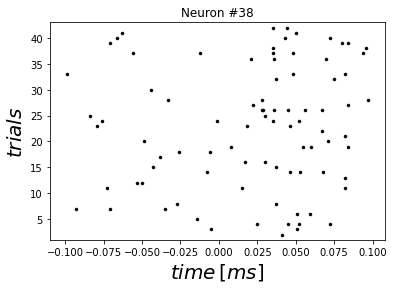

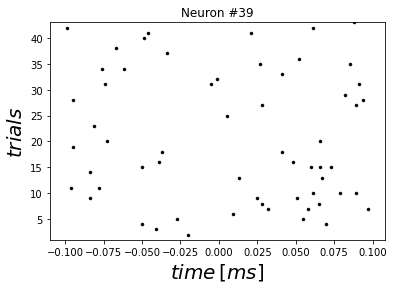

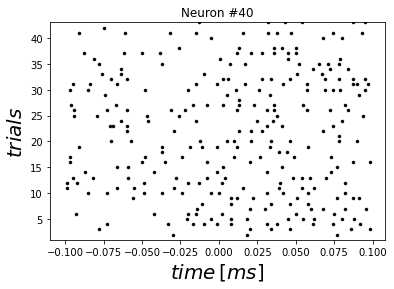

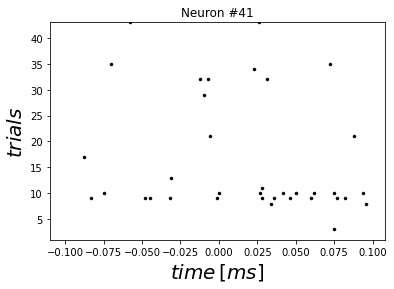

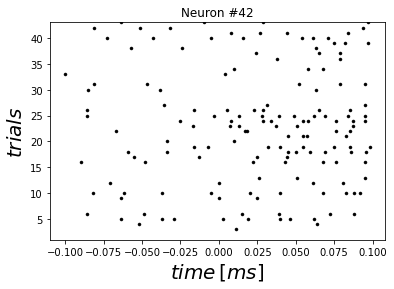

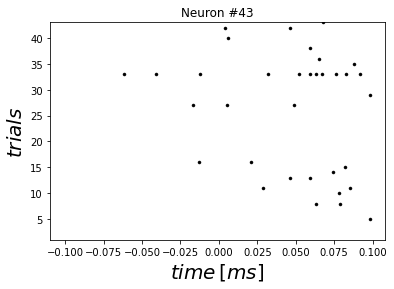

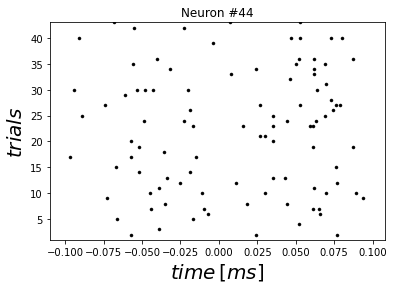

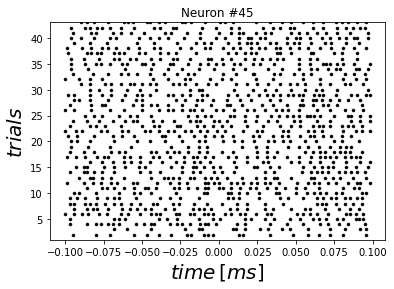

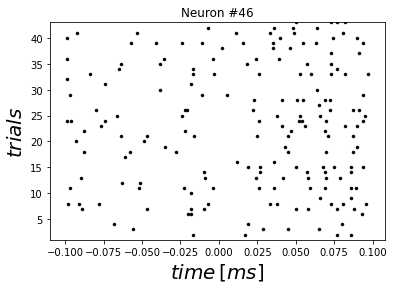

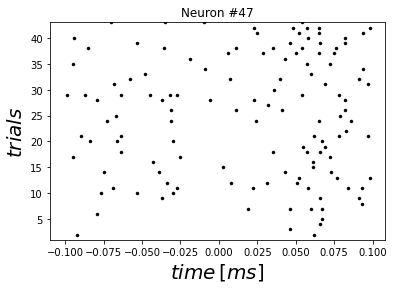

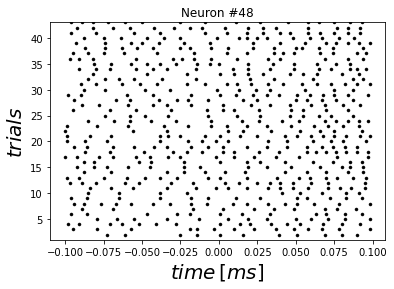

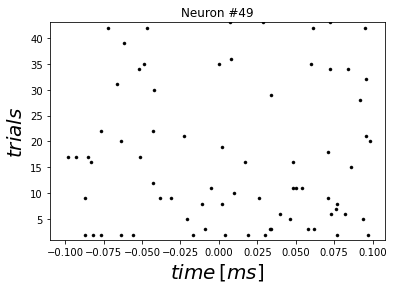

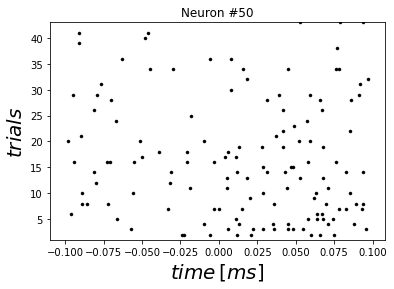

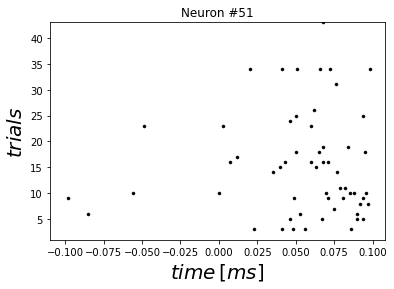

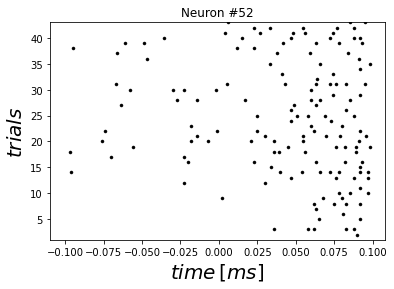

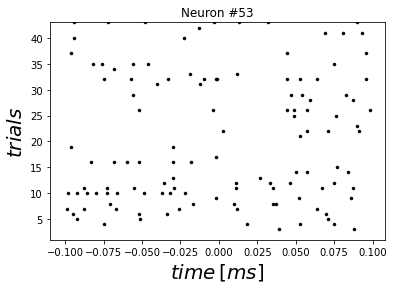

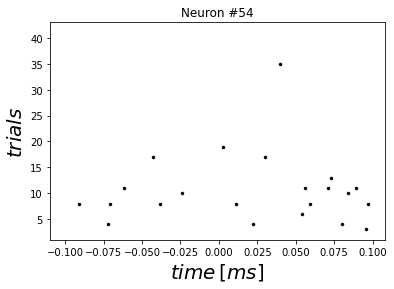

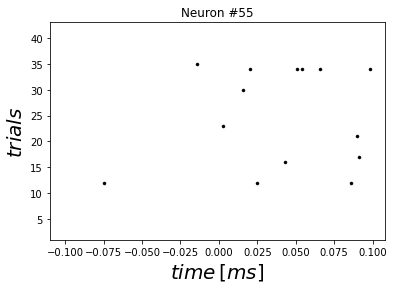

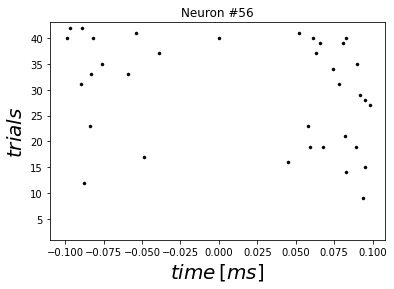

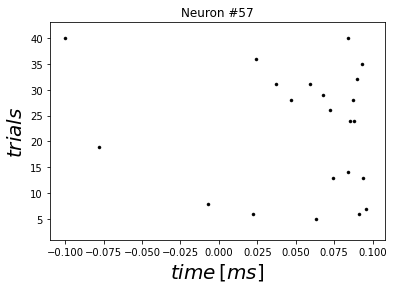

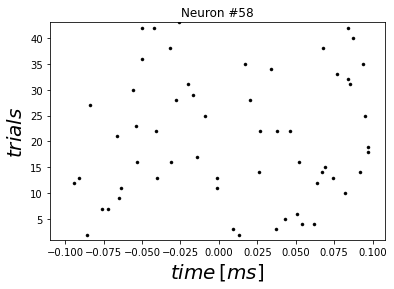

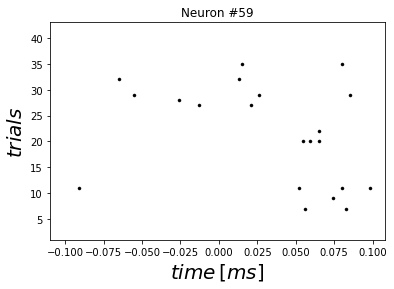

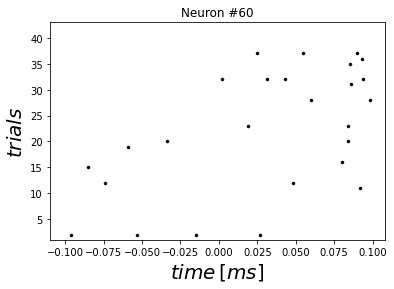

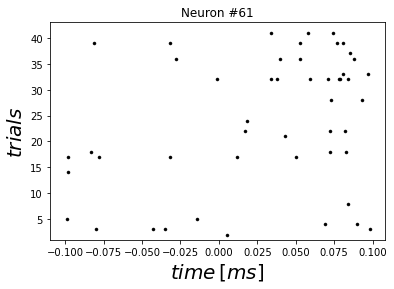

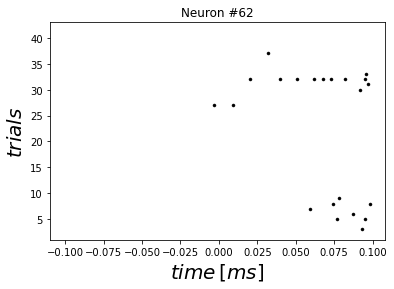

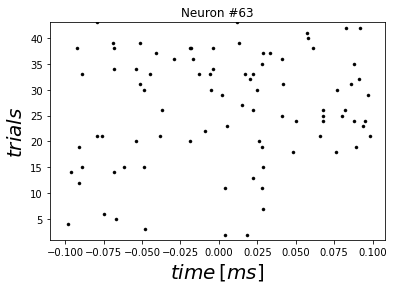

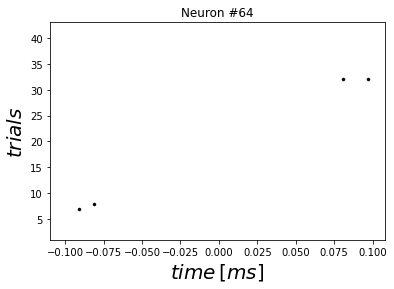

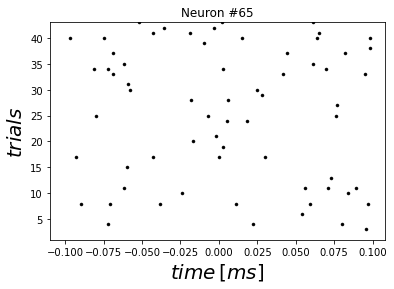

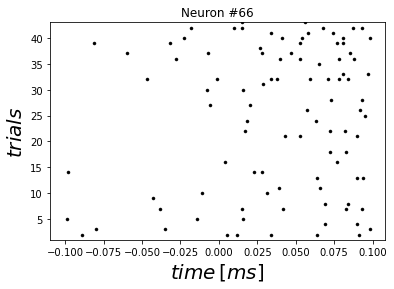

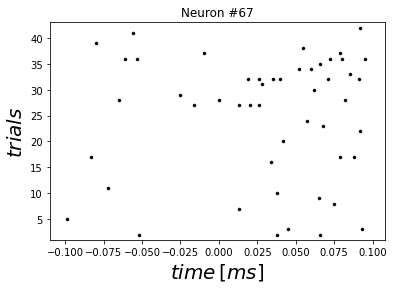

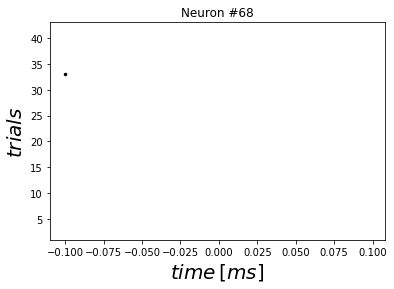

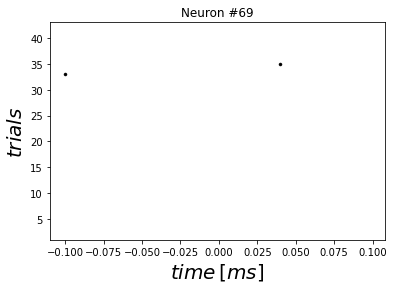

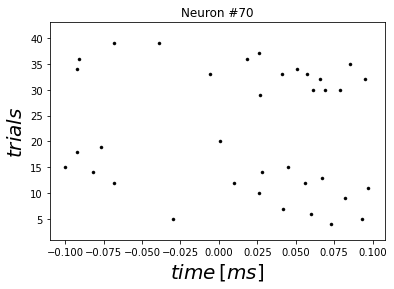

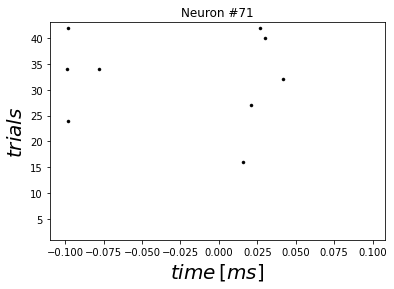

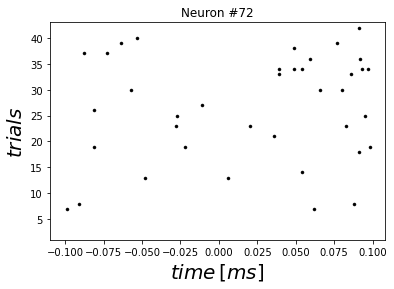

In [237]:
betterRaster(shift_aligned_data)

In [238]:
#rasters(linear_aligned_data)

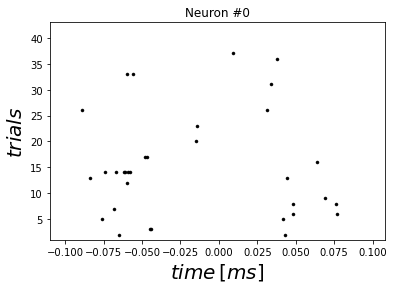

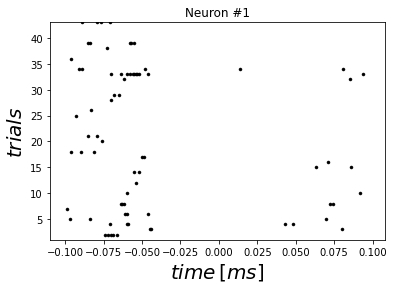

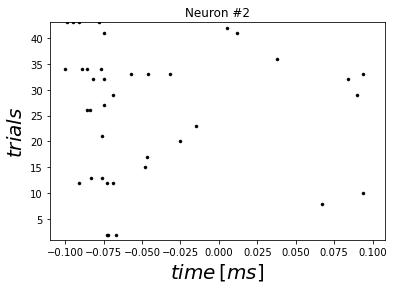

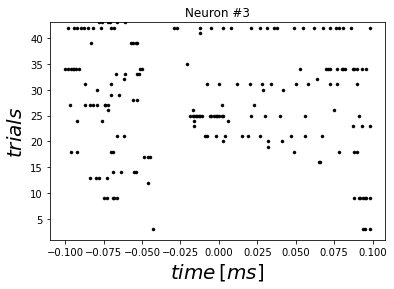

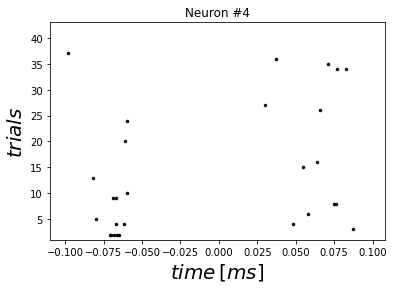

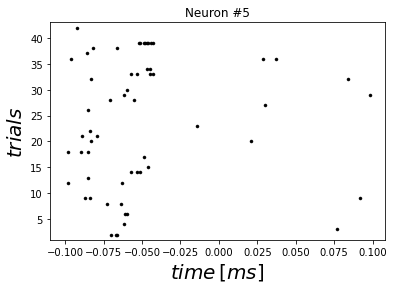

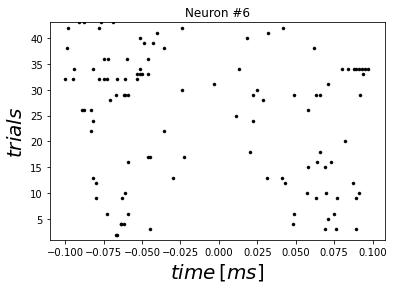

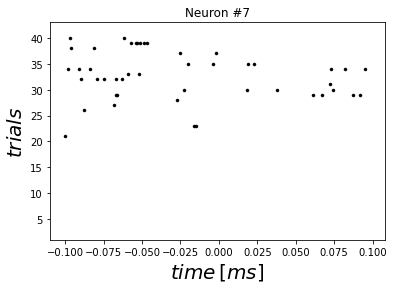

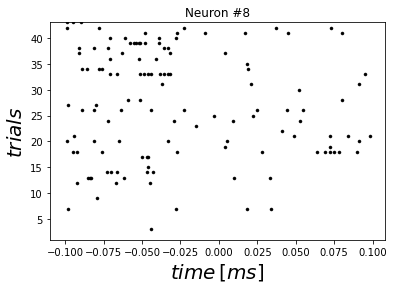

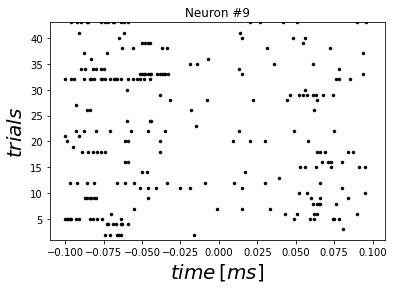

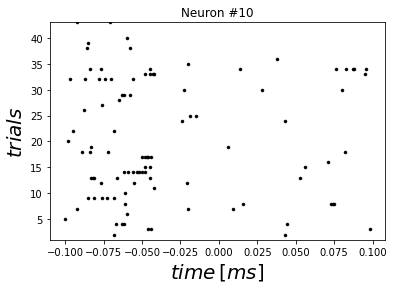

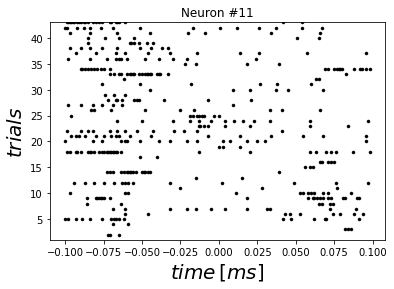

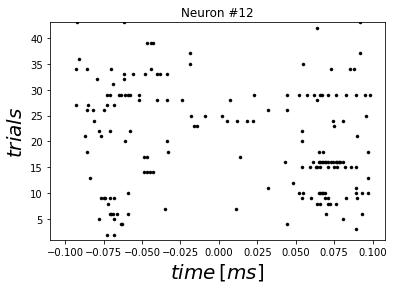

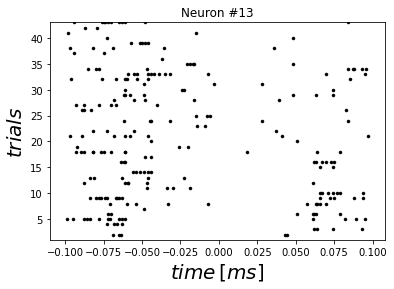

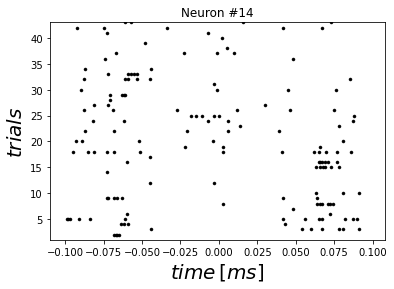

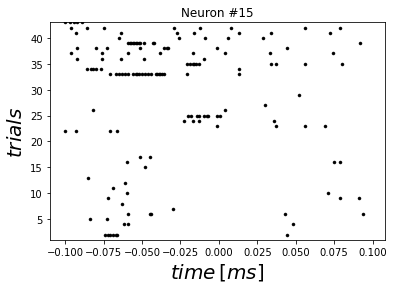

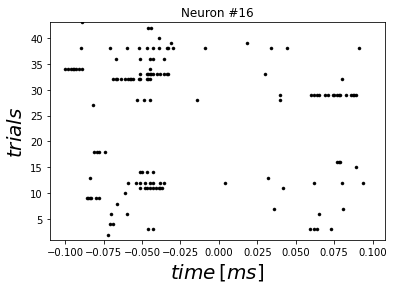

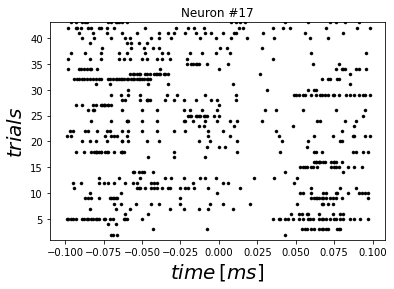

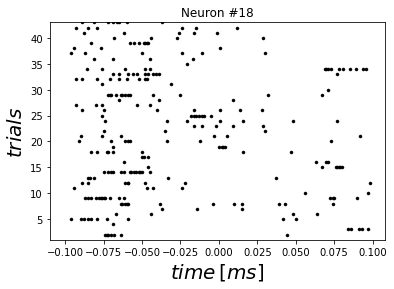

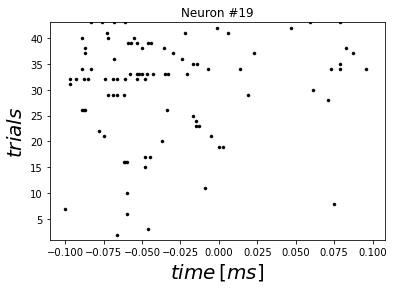

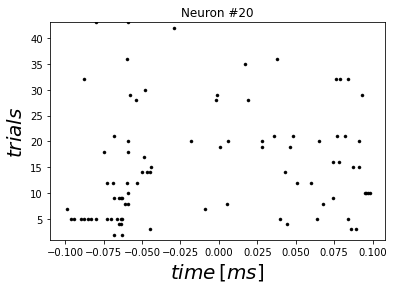

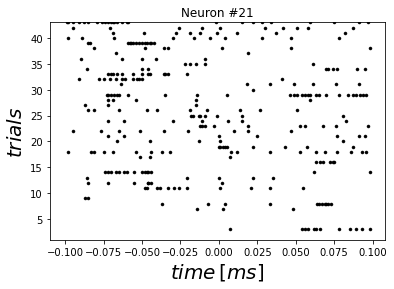

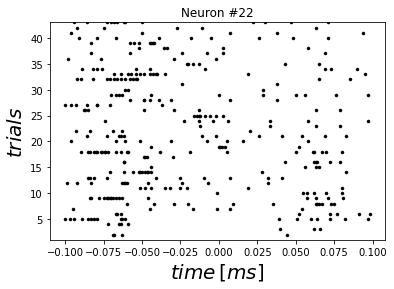

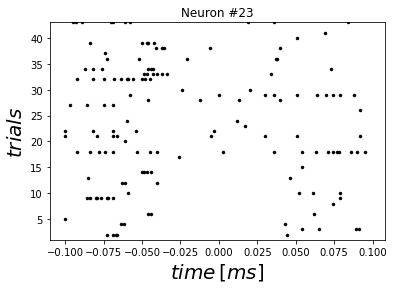

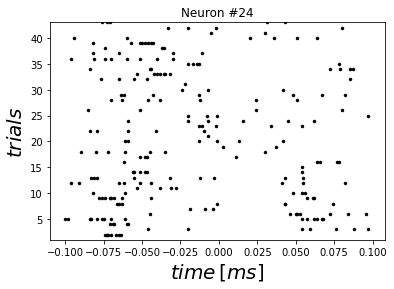

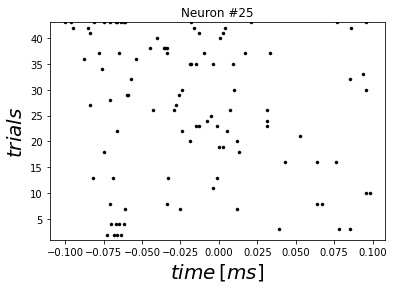

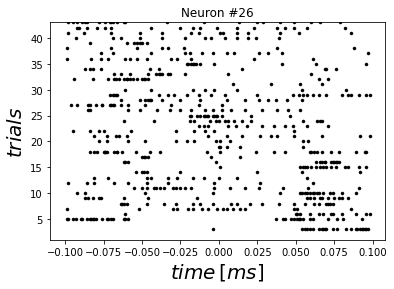

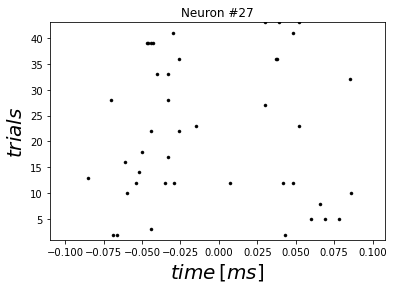

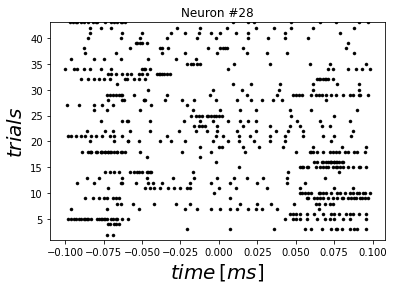

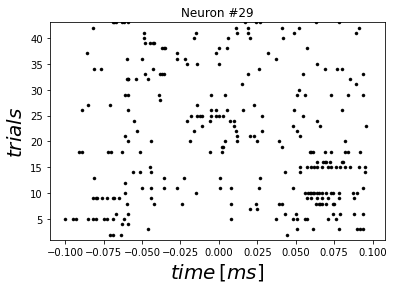

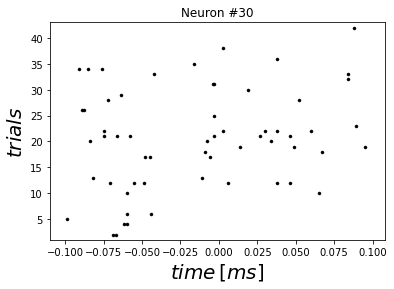

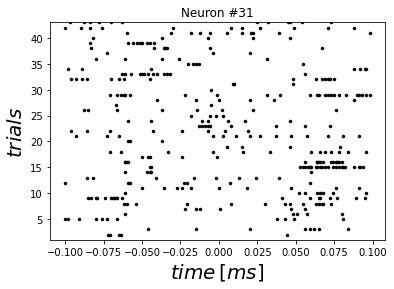

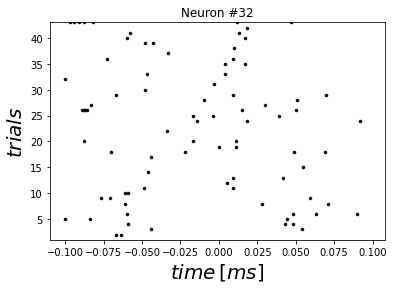

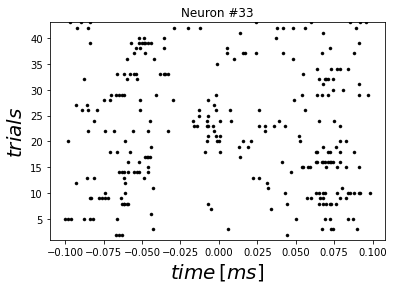

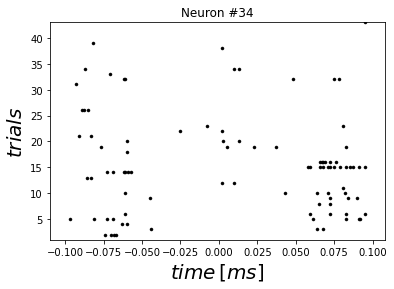

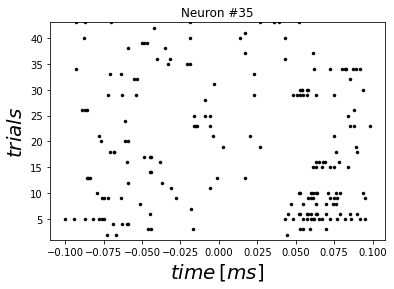

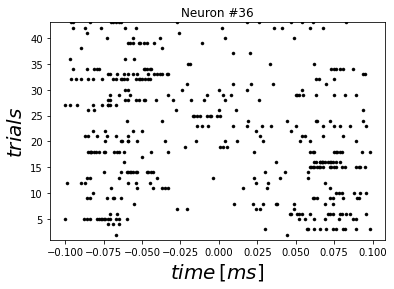

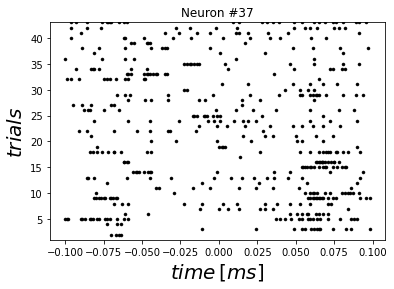

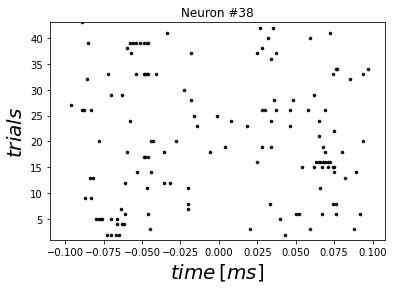

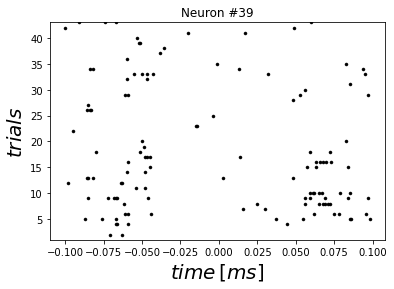

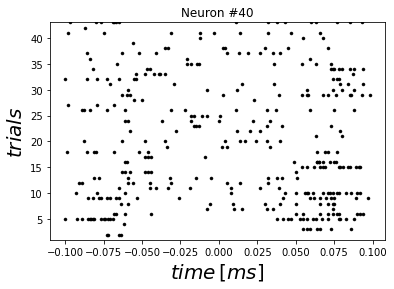

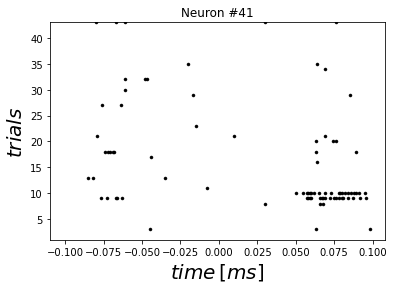

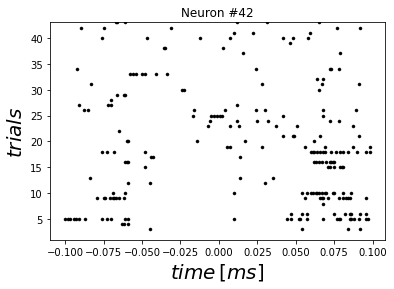

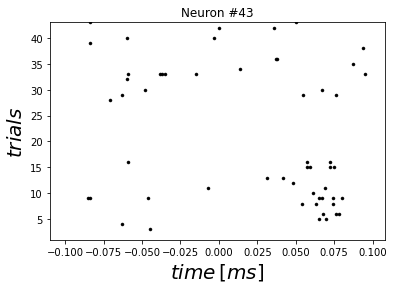

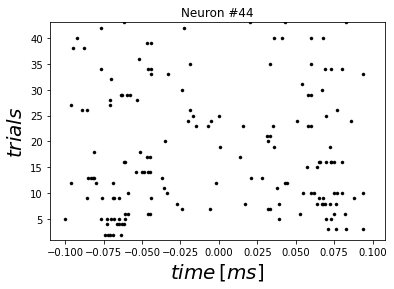

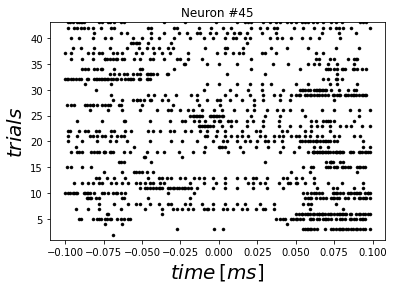

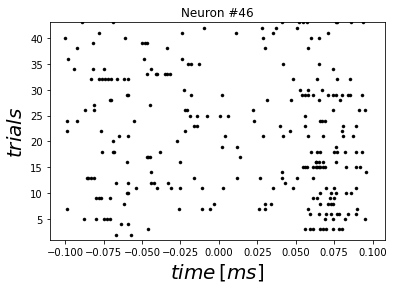

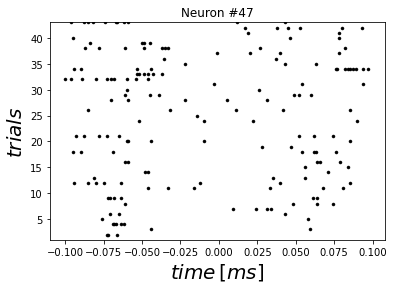

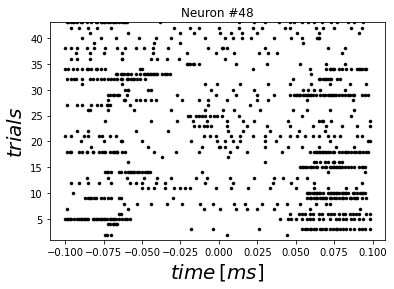

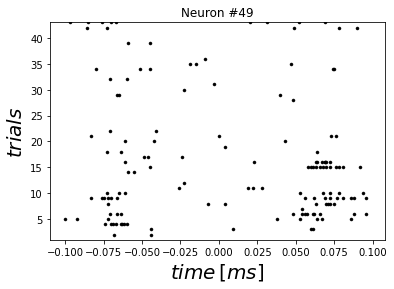

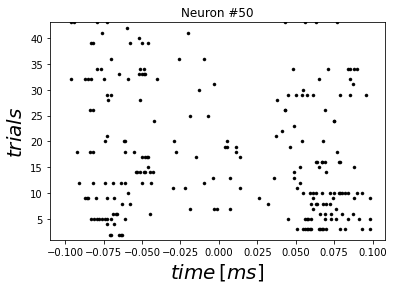

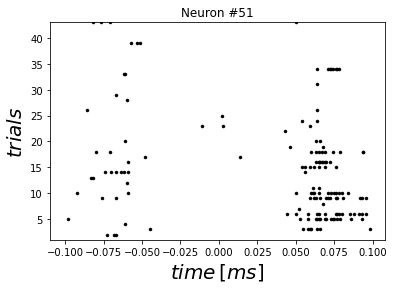

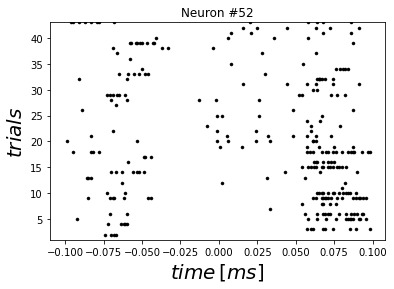

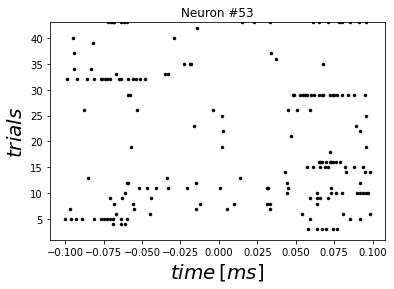

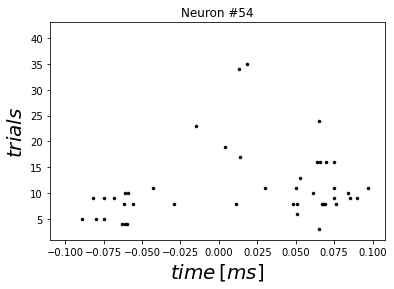

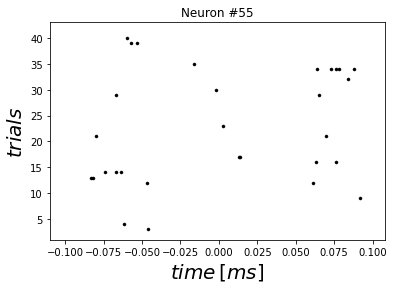

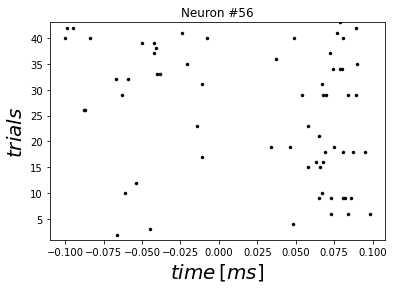

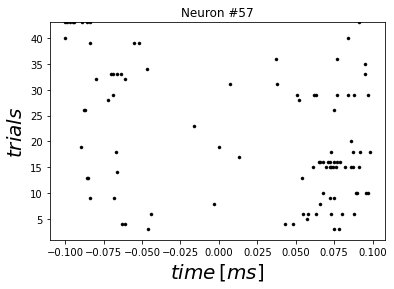

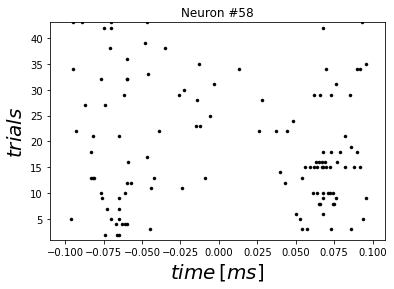

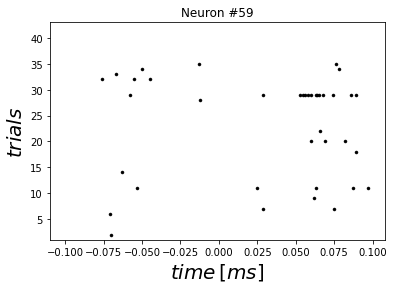

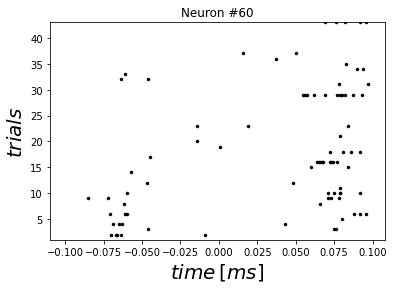

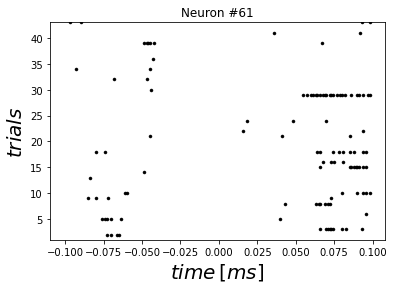

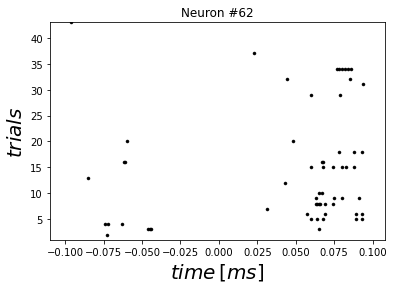

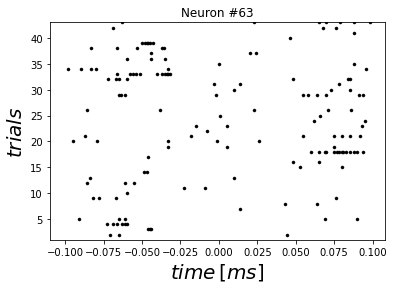

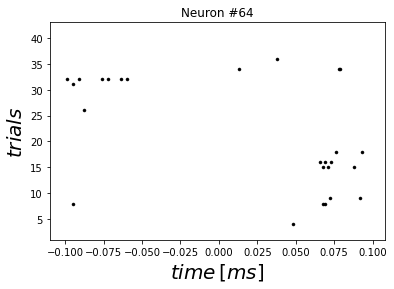

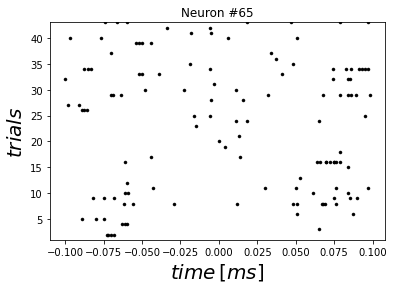

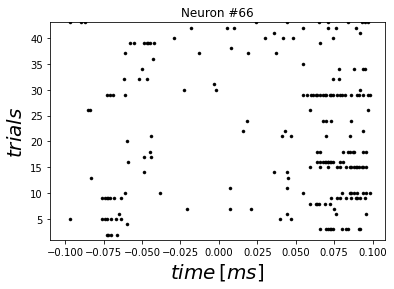

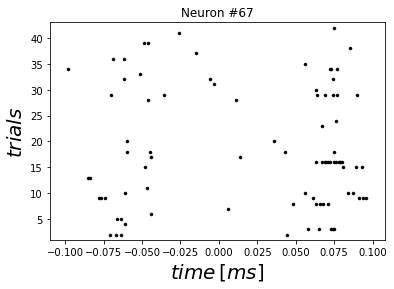

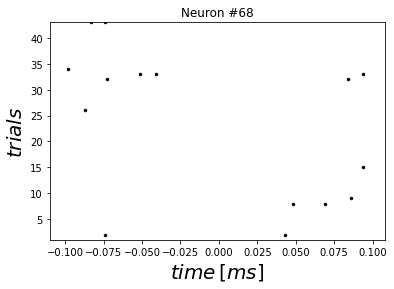

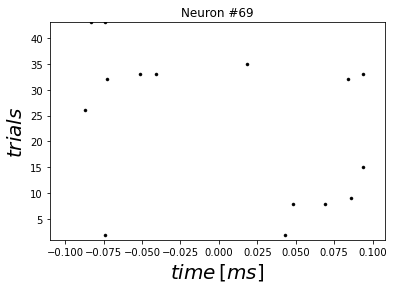

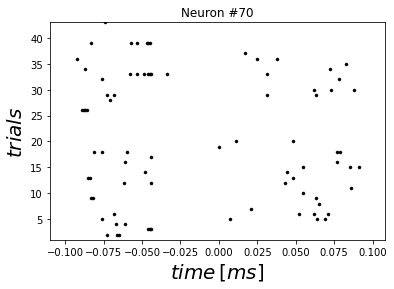

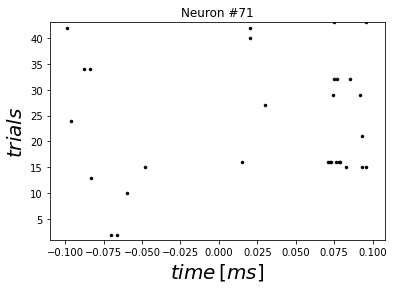

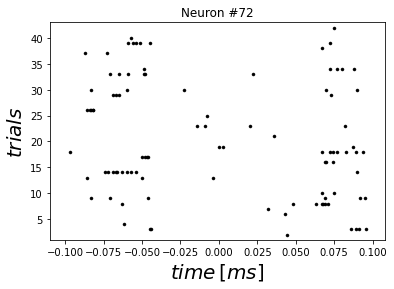

In [239]:
betterRaster(linear_aligned_data)

In [240]:
# kim

In [241]:
NBINS = 130         # Number of time bins per trial
SMOOTH_REG = 10.0   # Strength of roughness penalty
WARP_REG = 0.0      # Strength of penalty on warp magnitude
L2_REG = 0.0        # Strength of L2 penalty on template magnitude
MAXLAG = 0.5        # Maximum amount of shift allowed.

In [245]:
from affinewarp import ShiftWarping
shift_model = ShiftWarping(
    maxlag=MAXLAG,
    smoothness_reg_scale=SMOOTH_REG,
    warp_reg_scale=WARP_REG,
    l2_reg_scale=L2_REG,
)

# Fit and apply warping to held out neurons.
from affinewarp.crossval import heldout_transform
validated_alignments = heldout_transform(
    shift_model, data.bin_spikes(NBINS), data, iterations=100)

# Fit model to full dataset (used to align sniffs).
shift_model.fit(data.bin_spikes(NBINS))

# NOTE: various preprocessing and normalizations schemes (z-scoring,
# square-root-transforming the spike counts, etc.) could be tried here.

Loss: 0.02: 100%|██████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 57.75it/s]


In [247]:
shift_aligned_data

In [246]:
betterRaster(shift_aligned_data)

TypeError: 'ShiftWarping' object is not subscriptable

In [ ]:
from affinewarp import PiecewiseWarping
align_sniff = PiecewiseWarping()
align_sniff.manual_fit(
    data.bin_spikes(NBINS),
    np.column_stack([frac_onsets, np.full(data.n_trials, 0.4)]),
    recenter=False

In [ ]:
def _plot_column(axc, spks, sniffs):
    """
    Plots column of subplots.
    
    Parameters
    ----------
    axc : array, holding list of axes in column.
    spks : SpikeData object
    sniffs : array, holding sniff time on each trial.
    """
    
    # These are the neurons shown in the paper.
    example_neurons = [2, 6, 20, 22, 28, 9]

    # Plot raster plot for each neuron.
    raster_kws = dict(s=4, c='k', lw=0)
    for n, ax in zip(example_neurons, axc[:-1]):
        ax.scatter(
            spks.spiketimes[spks.neurons == n],
            spks.trials[spks.neurons == n],
            **raster_kws,
        )
        ax.set_ylim(-1, len(sniffs))
        ax.axis('off')

        # Plot blue dots, denoting sniffs, on rasters.
        sniff_kws = dict(c='b', s=5, alpha=.55, lw=0)
        ax.scatter(sniffs, range(sniffs.size), **sniff_kws)

    # Plot histogram at bottom.
    histbins = np.linspace(0, 500, 50)
    if len(np.unique(np.histogram(sniffs, histbins)[0])) == 2:
        axc[-1].axvline(sniffs.mean(), c='b', alpha=.7, lw=2, dashes=[2,2])
    else:
        axc[-1].hist(sniffs, histbins, color='blue', alpha=.65)
    
    # Format bottom subplot.
    axc[-1].spines['right'].set_visible(False)
    axc[-1].spines['top'].set_visible(False)
    axc[-1].set_ylim(0, 15)


# Create figure.
fig, axes = plt.subplots(7, 4, figsize=(9.5, 6))


# First column, raw data.
_plot_column(
    axes[:, 0], data, Z["sniff_onsets"]
)

# Second column, re-sorted trials by warping function.
_plot_column(
    axes[:, 1],
    data.reorder_trials(shift_model.argsort_warps()),
    Z["sniff_onsets"][shift_model.argsort_warps()]
)

# Third column, shifted alignment.
_plot_column(
    axes[:, 2],
    validated_alignments,
    shift_model.event_transform(
        range(Z["sniff_onsets"].size), frac_onsets) * Z["tmax"],
)

# Final column, aligned to sniff onset.
_plot_column(
    axes[:, 3],
    align_sniff.transform(data),
    align_sniff.event_transform(
        range(Z["sniff_onsets"].size), frac_onsets) * Z["tmax"],
)

# Final formatting.
for ax in axes.ravel():
    ax.set_xlim(-50, 550)
for ax in axes[-1]:
    ax.set_xlabel("time (ms)")

axes[0, 0].set_title("raw data")
axes[0, 1].set_title("sorted by warp")
axes[0, 2].set_title("aligned by model")
axes[0, 3].set_title("aligned to sniff")

fig.tight_layout()
fig.subplots_adjust(hspace=.3)

In [39]:
# Compute trial-averaged firing rates
trial_avg_raw = data.bin_spikes(NBINS).mean(axis=0) / (BINSIZE * 1e-3)
trial_avg_aligned = linear_aligned_data.bin_spikes(NBINS).mean(axis=0) / (BINSIZE * 1e-3)
tx = numpy.linspace(TMIN, TMAX, NBINS)

# Show 5 example neurons (red traces, show more oscillations after warping)
fig, axes = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(12, 7))

for n, axc in zip([1, 9, 10, 15, 19], axes.T):
    axc[0].plot(tx, trial_avg_raw[:, n], "-k")
    axc[1].plot(tx, trial_avg_aligned[:, n], "-r")

for ax in axes.ravel():
    ax.set_ylim([-10, 100])

NameError: name 'numpy' is not defined